# California Housing Price Prediction Model

This notebook builds a complete end-to-end machine learning pipeline for predicting California housing prices using the sklearn dataset.

## Sections:
1. Data Loading and Exploration
2. Feature Engineering
3. Data Preprocessing
4. Baseline Model
5. Model Training and Comparison
6. Hyperparameter Tuning
7. Model Evaluation and Analysis
8. Results Visualization
9. Model Persistence

## 1. Data Loading and Exploration

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

In [3]:
# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a DataFrame
df = housing.frame

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()

Dataset Shape: (20640, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First few rows:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [4]:
# Display dataset description
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nNo missing values found!" if df.isnull().sum().sum() == 0 else "Warning: Missing values detected!")

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No missing values found!


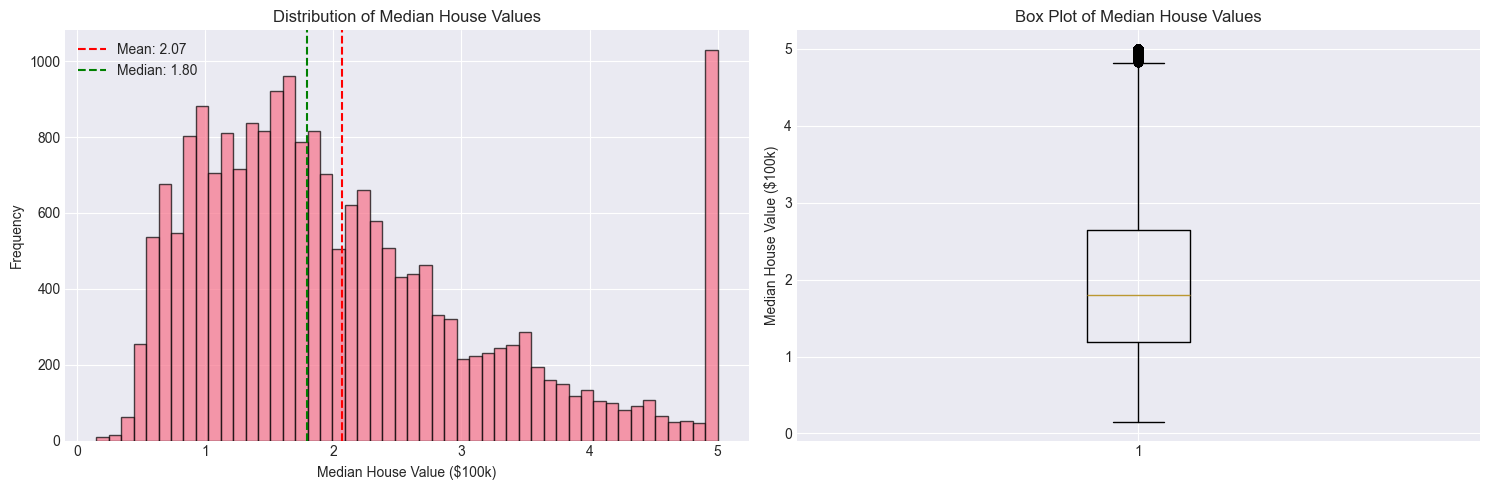

Target Variable Statistics:
Mean: $206.86k
Median: $179.70k
Min: $15.00k
Max: $500.00k
Std: $115.40k


In [7]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median House Value ($100k)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Median House Values')
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', label=f'Mean: {df["MedHouseVal"].mean():.2f}')
axes[0].axvline(df['MedHouseVal'].median(), color='green', linestyle='--', label=f'Median: {df["MedHouseVal"].median():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['MedHouseVal'])
axes[1].set_ylabel('Median House Value ($100k)')
axes[1].set_title('Box Plot of Median House Values')

plt.tight_layout()
plt.show()

print(f"Target Variable Statistics:")
print(f"Mean: ${df['MedHouseVal'].mean() * 100:.2f}k")
print(f"Median: ${df['MedHouseVal'].median() * 100:.2f}k")
print(f"Min: ${df['MedHouseVal'].min() * 100:.2f}k")
print(f"Max: ${df['MedHouseVal'].max() * 100:.2f}k")
print(f"Std: ${df['MedHouseVal'].std() * 100:.2f}k")

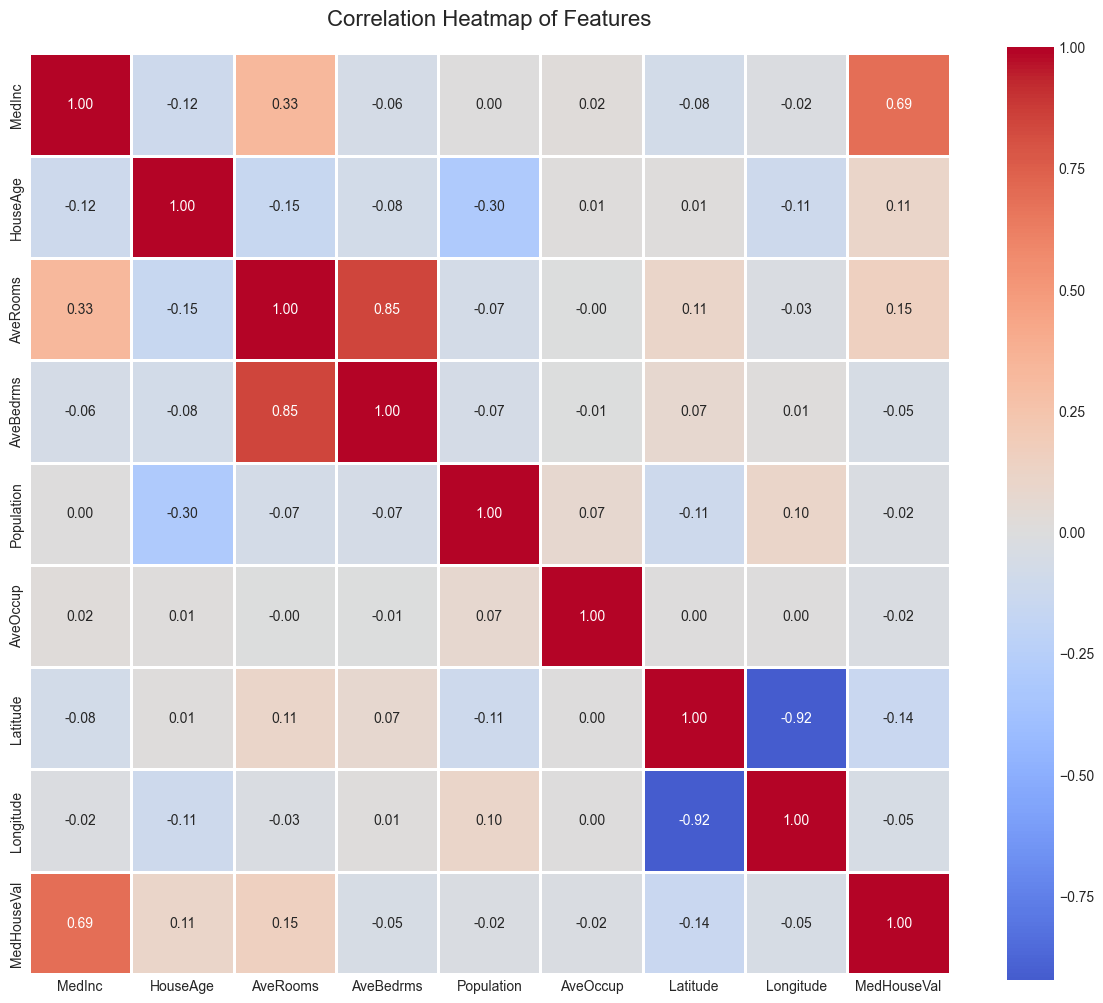


Correlations with MedHouseVal (sorted):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target
print("\nCorrelations with MedHouseVal (sorted):")
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))

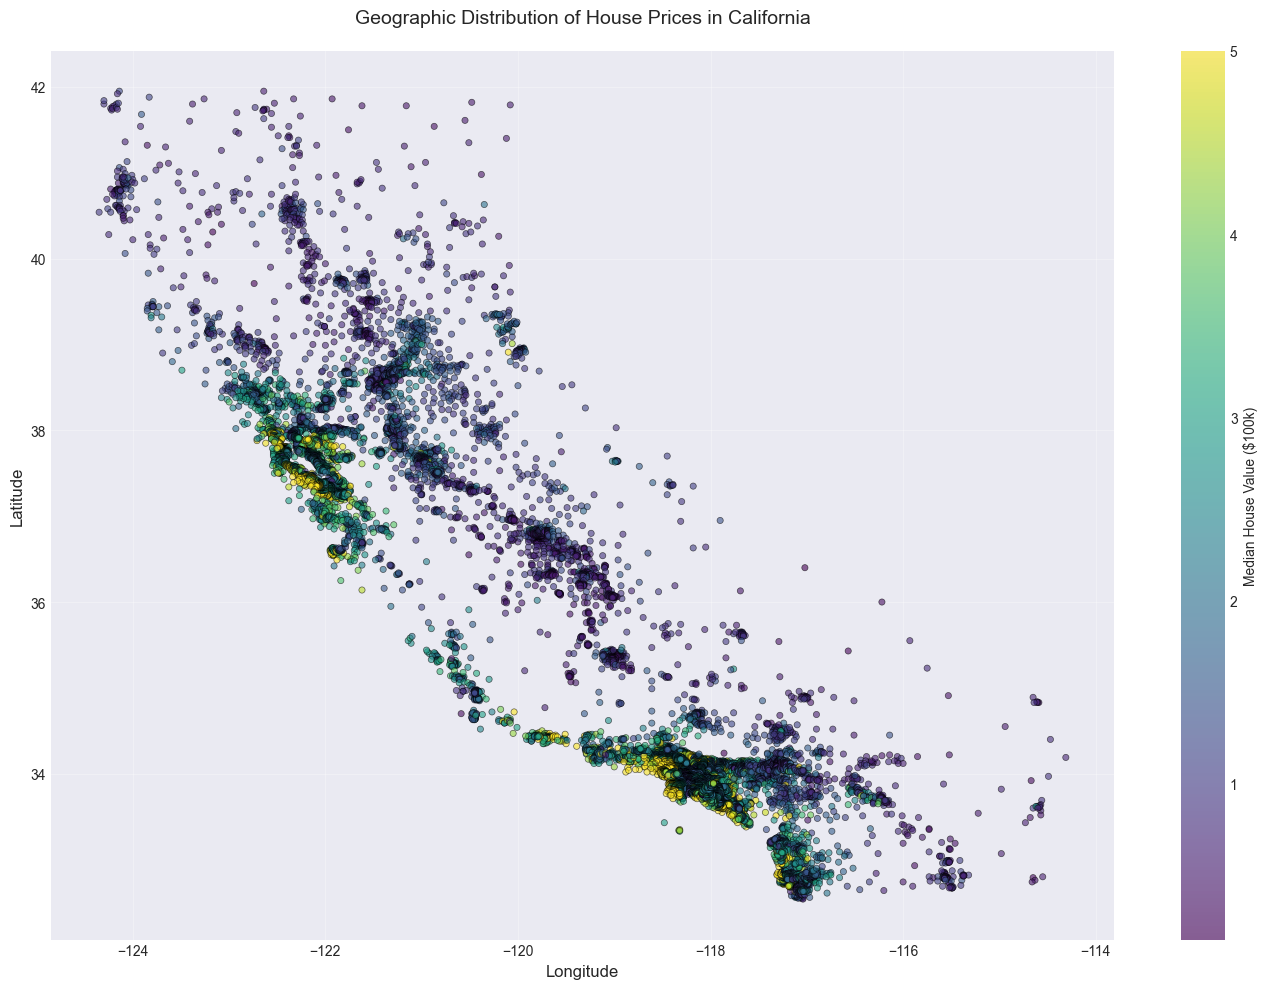


Geographic insights:
- Coastal areas (especially near SF and LA) show higher prices
- Inland areas generally have lower prices
- Clear geographic clustering patterns visible


In [9]:
# Geographic distribution of house prices
plt.figure(figsize=(14, 10))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='viridis', 
                     alpha=0.6, s=20, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Median House Value ($100k)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geographic Distribution of House Prices in California', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGeographic insights:")
print("- Coastal areas (especially near SF and LA) show higher prices")
print("- Inland areas generally have lower prices")
print("- Clear geographic clustering patterns visible")

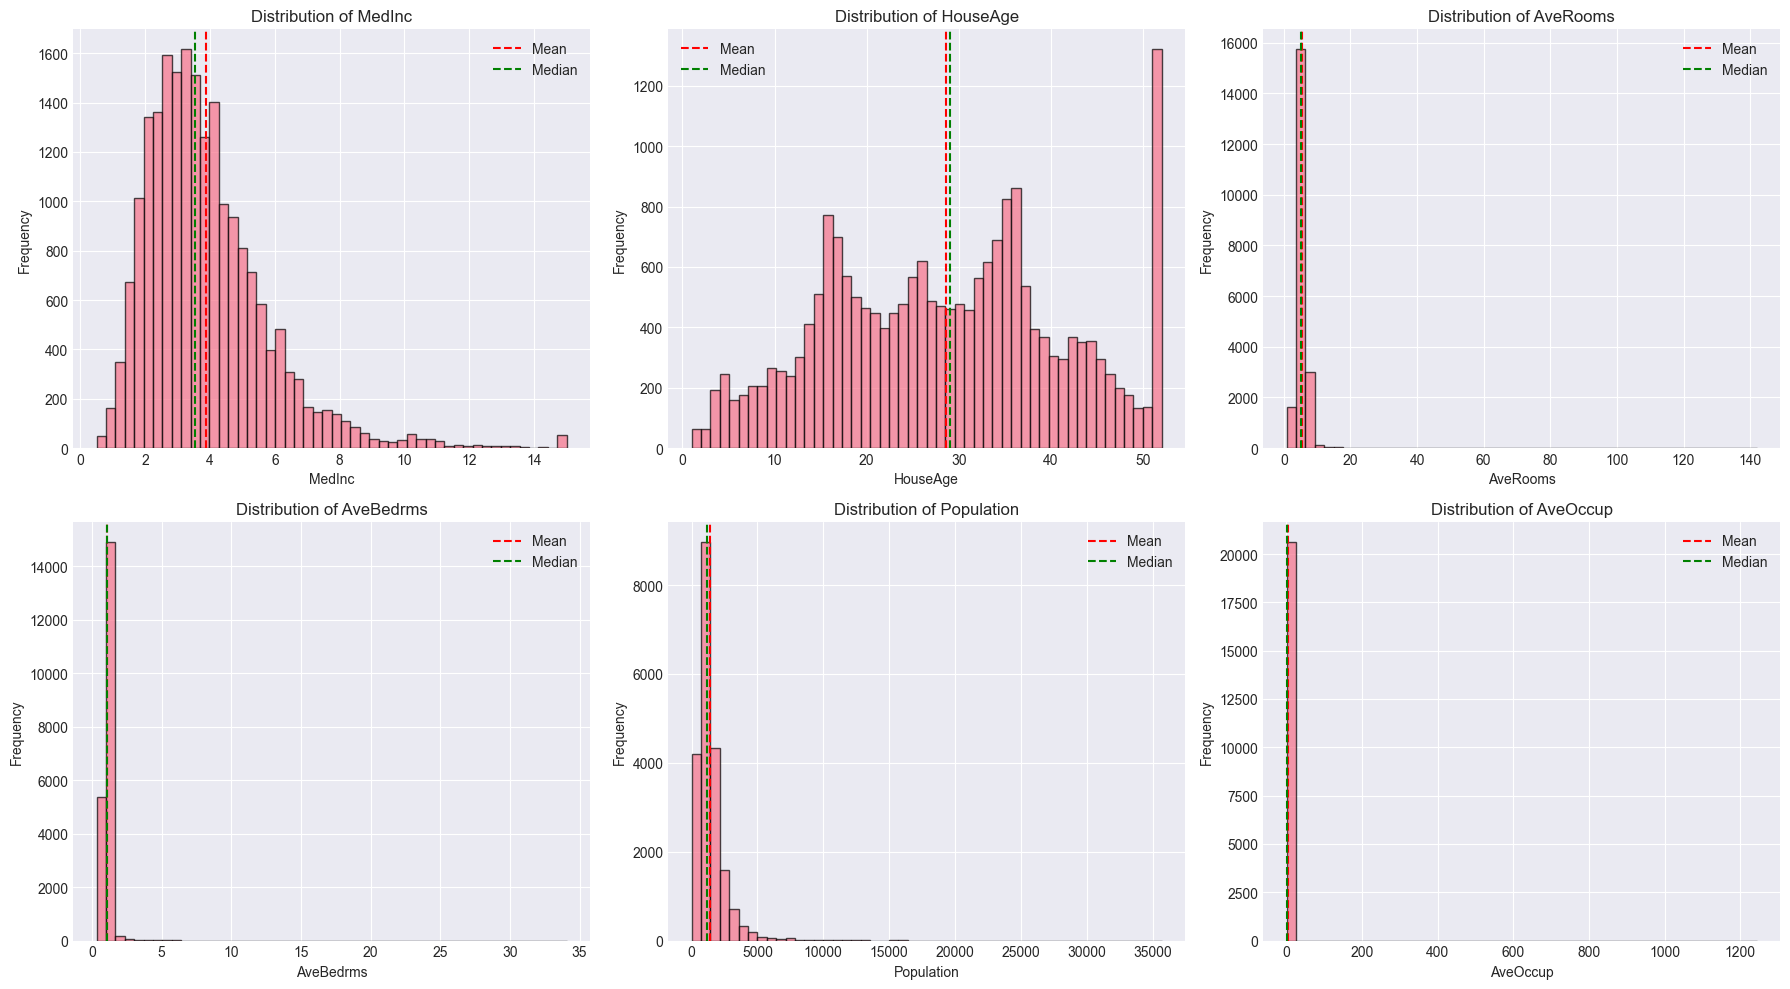

In [10]:
# Distribution of key features
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].axvline(df[feature].median(), color='green', linestyle='--', label='Median')
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [11]:
# Identify outliers using IQR method
print("Outlier Analysis with IQR method:\n")

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    if outlier_pct > 0:
        print(f"{col}: {len(outliers)} outliers ({outlier_pct:.2f}%)")

Outlier Analysis with IQR method:

MedInc: 681 outliers (3.30%)
AveRooms: 511 outliers (2.48%)
AveBedrms: 1424 outliers (6.90%)
Population: 1196 outliers (5.79%)
AveOccup: 711 outliers (3.44%)
MedHouseVal: 1071 outliers (5.19%)


## 2. Feature Engineering

In [12]:
# Create a copy for feature engineering
df_engineered = df.copy()

# 1. Rooms per household ratio
df_engineered['rooms_per_household'] = df_engineered['AveRooms'] / df_engineered['AveOccup']

# 2. Bedrooms ratio
df_engineered['bedrooms_ratio'] = df_engineered['AveBedrms'] / df_engineered['AveRooms']

# 3. Population per household
df_engineered['population_per_household'] = df_engineered['Population'] / df_engineered['AveOccup']

# Handle any infinite or NaN values from division
df_engineered.replace([np.inf, -np.inf], np.nan, inplace=True)
df_engineered.fillna(df_engineered.median(), inplace=True)

print(f"Basic ratio features created: rooms_per_household, bedrooms_ratio, population_per_household")
print(f"\nNew dataset shape: {df_engineered.shape}")

Basic ratio features created: rooms_per_household, bedrooms_ratio, population_per_household

New dataset shape: (20640, 12)


In [13]:
# 4. Geographic clusters using KMeans
from sklearn.cluster import KMeans

# Create location clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_engineered['location_cluster'] = kmeans.fit_predict(df_engineered[['Latitude', 'Longitude']])

print(f"Created 10 geographic clusters based on Latitude and Longitude")
print(f"\nCluster distribution:")
print(df_engineered['location_cluster'].value_counts().sort_index())

Created 10 geographic clusters based on Latitude and Longitude

Cluster distribution:
location_cluster
0    1756
1    3153
2    1013
3    7269
4    1471
5    1809
6     472
7     939
8    1769
9     989
Name: count, dtype: int64


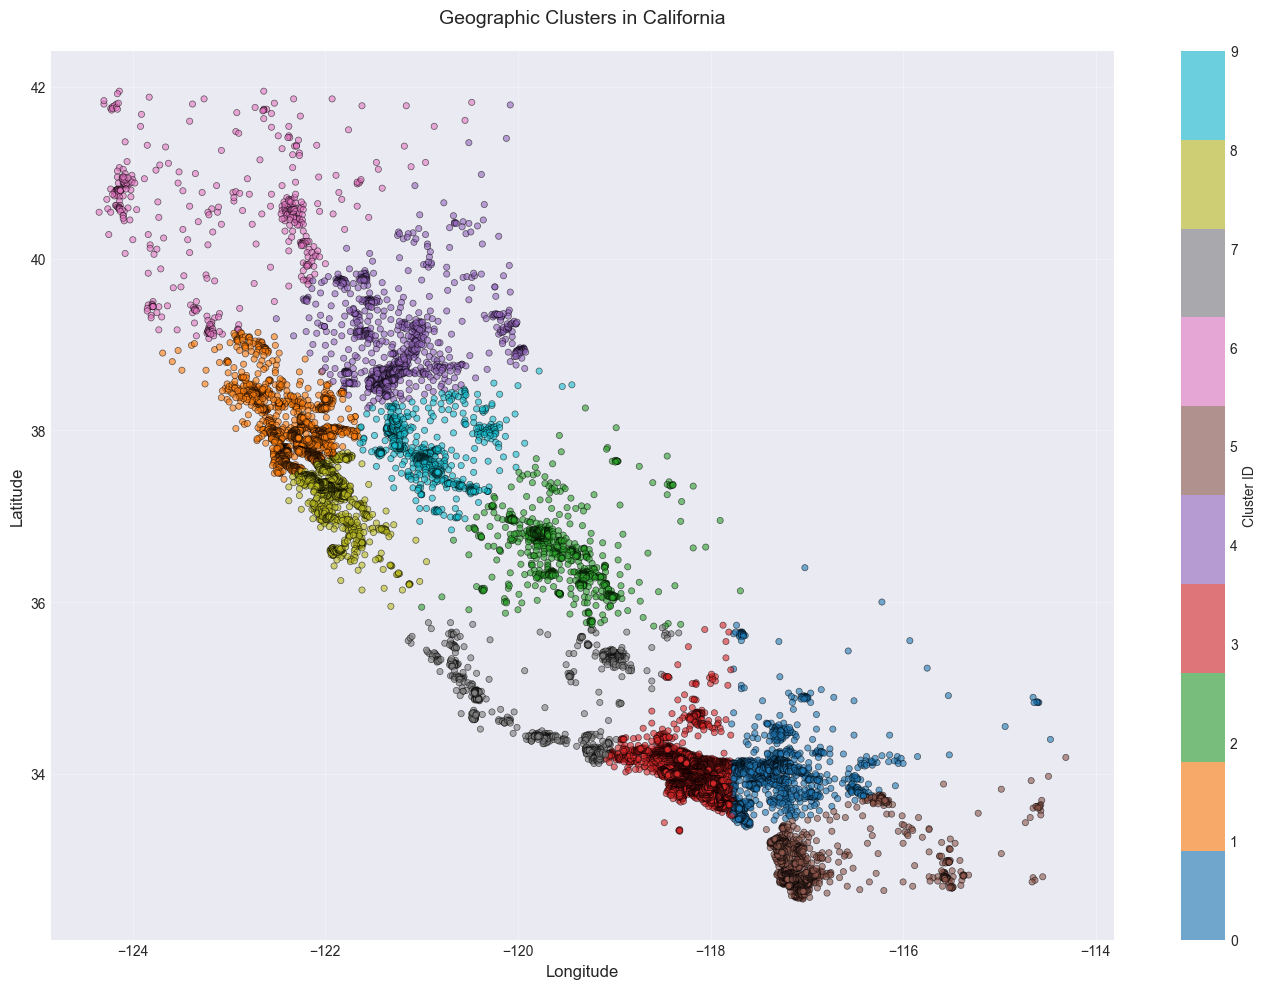

In [14]:
# Visualize geographic clusters
plt.figure(figsize=(14, 10))
scatter = plt.scatter(df_engineered['Longitude'], df_engineered['Latitude'], 
                     c=df_engineered['location_cluster'], cmap='tab10', 
                     alpha=0.6, s=20, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geographic Clusters in California', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# 5. Distance to major cities
# Major city coordinates (approximate)
SF_coords = (37.7749, -122.4194)  # San Francisco
LA_coords = (34.0522, -118.2437)  # Los Angeles
SD_coords = (32.7157, -117.1611)  # San Diego

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on earth (in km)"""
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

df_engineered['distance_to_SF'] = haversine_distance(
    df_engineered['Latitude'], df_engineered['Longitude'], 
    SF_coords[0], SF_coords[1]
)

df_engineered['distance_to_LA'] = haversine_distance(
    df_engineered['Latitude'], df_engineered['Longitude'], 
    LA_coords[0], LA_coords[1]
)

df_engineered['distance_to_SD'] = haversine_distance(
    df_engineered['Latitude'], df_engineered['Longitude'], 
    SD_coords[0], SD_coords[1]
)

# Minimum distance to any major city
df_engineered['distance_to_nearest_city'] = df_engineered[[
    'distance_to_SF', 'distance_to_LA', 'distance_to_SD'
]].min(axis=1)

print("Distance features created:")
print(f"- distance_to_SF (mean: {df_engineered['distance_to_SF'].mean():.2f} km)")
print(f"- distance_to_LA (mean: {df_engineered['distance_to_LA'].mean():.2f} km)")
print(f"- distance_to_SD (mean: {df_engineered['distance_to_SD'].mean():.2f} km)")
print(f"- distance_to_nearest_city (mean: {df_engineered['distance_to_nearest_city'].mean():.2f} km)")

Distance features created:
- distance_to_SF (mean: 386.07 km)
- distance_to_LA (mean: 269.42 km)
- distance_to_SD (mean: 398.17 km)
- distance_to_nearest_city (mean: 77.22 km)


In [16]:
# 6. Income categories
df_engineered['income_category'] = pd.cut(
    df_engineered['MedInc'],
    bins=[0, 2.5, 4.5, np.inf],
    labels=['low', 'medium', 'high']
)

# Convert to numeric for modeling
income_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_engineered['income_category_num'] = df_engineered['income_category'].map(income_mapping)

print("Income categories created:")
print(df_engineered['income_category'].value_counts())
print(f"\nMean house value by income category:")
print(df_engineered.groupby('income_category')['MedHouseVal'].mean().sort_values(ascending=False))

Income categories created:
income_category
medium    9834
high      6001
low       4805
Name: count, dtype: int64

Mean house value by income category:
income_category
high      3.056722
medium    1.883299
low       1.213588
Name: MedHouseVal, dtype: float64


In [17]:
# Summary of all features
print(f"\nTotal features after engineering: {df_engineered.shape[1]}")
print(f"\nAll columns:")
print(df_engineered.columns.tolist())

# Drop the categorical column (keep only numeric version)
df_engineered = df_engineered.drop(columns=['income_category'])

print(f"\nFinal shape: {df_engineered.shape}")
df_engineered.head()


Total features after engineering: 19

All columns:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal', 'rooms_per_household', 'bedrooms_ratio', 'population_per_household', 'location_cluster', 'distance_to_SF', 'distance_to_LA', 'distance_to_SD', 'distance_to_nearest_city', 'income_category', 'income_category_num']

Final shape: (20640, 18)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  rooms_per_household  bedrooms_ratio  \
0    -122.23        4.526             2.732919        0.146591   
1    -122.22        3.585             2.956685        0.155797   
2    -122.24        3.521             2.957661        0.129516   
3    -122.25        3.413             2.283154        0.184458   
4    -122.25        3.422             2.879646        0.172096   

   population_per_household  location_cluster  distance_to_SF  distance_to_LA  \
0                     126.0                 1       20.329542      556.531199   
1                    1138.0                 1       19.908065      554.281885   
2                     177.0                 1       17.835390      554.612739   
3                     219.0                 1       17.064123      555.196283   
4                     259.0                 1       17.064123      555.196283   

   distance_to_SD  distance_to_nearest_city income_category_num  
0      735.504257                 20.329542                   2  
1      733.239331                 19.908065                   2  
2      733.528120                 17.835390                   2  
3      734.097724                 17.064123                   2  
4      734.097724                 17.064123                   1

In [18]:
# Check correlations of new features with target
new_features = ['rooms_per_household', 'bedrooms_ratio', 'population_per_household',
                'distance_to_SF', 'distance_to_LA', 'distance_to_SD', 
                'distance_to_nearest_city', 'income_category_num', 'location_cluster']

print("Correlation of engineered features with MedHouseVal:\n")
correlations = df_engineered[new_features + ['MedHouseVal']].corr()['MedHouseVal'].sort_values(ascending=False)
print(correlations[1:])  # Exclude MedHouseVal itself

Correlation of engineered features with MedHouseVal:

income_category_num         0.584363
rooms_per_household         0.209482
population_per_household    0.065843
location_cluster           -0.012067
distance_to_SF             -0.030247
distance_to_SD             -0.092511
distance_to_LA             -0.130679
bedrooms_ratio             -0.255624
distance_to_nearest_city   -0.420344
Name: MedHouseVal, dtype: float64


## 3. Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_engineered.drop('MedHouseVal', axis=1)
y = df_engineered['MedHouseVal']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")

Features shape: (20640, 17)
Target shape: (20640,)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'rooms_per_household', 'bedrooms_ratio', 'population_per_household', 'location_cluster', 'distance_to_SF', 'distance_to_LA', 'distance_to_SD', 'distance_to_nearest_city', 'income_category_num']


In [20]:
# Create income-based stratification bins for splitting
# This ensures both train and test sets have similar income distributions
income_bins = pd.cut(df_engineered['MedInc'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=income_bins
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Test set: {X_test.shape[0]/len(X)*100:.1f}%")

Training set size: 16512 samples
Test set size: 4128 samples

Training set: 80.0%
Test set: 20.0%


In [21]:
# Check stratification worked
print("Income distribution comparison:\n")
print("Original dataset:")
print(income_bins.value_counts(normalize=True).sort_index())
print("\nTraining set:")
train_income_bins = pd.cut(X_train['MedInc'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
print(train_income_bins.value_counts(normalize=True).sort_index())
print("\nTest set:")
test_income_bins = pd.cut(X_test['MedInc'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
print(test_income_bins.value_counts(normalize=True).sort_index())

Income distribution comparison:

Original dataset:
MedInc
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: proportion, dtype: float64

Training set:
MedInc
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: proportion, dtype: float64

Test set:
MedInc
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: proportion, dtype: float64


In [22]:
# Feature scaling using StandardScaler
scaler = StandardScaler()

# Fit on training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed!")
print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

print("\nSample of scaled features (first 5 rows, first 5 columns):")
print(X_train_scaled.iloc[:5, :5])

Feature scaling completed!

Scaled training set shape: (16512, 17)
Scaled test set shape: (4128, 17)

Sample of scaled features (first 5 rows, first 5 columns):
         MedInc  HouseAge  AveRooms  AveBedrms  Population
12655 -0.893647  0.027564  0.017395   0.060107    0.732602
15502  1.292168 -1.722018  0.569256   0.029314    0.533612
2908  -0.525434  1.220460 -0.018024  -0.128357   -0.674675
14053 -0.865929 -0.370069 -0.595140  -0.047102   -0.467617
20496  0.325752 -0.131489  0.251241   0.030323    0.374060


In [23]:
# Verify scaling: mean should be ~0, std should be ~1
print("Verification of scaling on training set:\n")
print("Means (should be ~0):")
print(X_train_scaled.mean().round(10))
print("\nStandard deviations (should be ~1):")
print(X_train_scaled.std().round(3))

Verification of scaling on training set:

Means (should be ~0):
MedInc                     -0.0
HouseAge                    0.0
AveRooms                   -0.0
AveBedrms                  -0.0
Population                 -0.0
AveOccup                    0.0
Latitude                    0.0
Longitude                   0.0
rooms_per_household         0.0
bedrooms_ratio             -0.0
population_per_household   -0.0
location_cluster            0.0
distance_to_SF              0.0
distance_to_LA             -0.0
distance_to_SD              0.0
distance_to_nearest_city   -0.0
income_category_num        -0.0
dtype: float64

Standard deviations (should be ~1):
MedInc                      1.0
HouseAge                    1.0
AveRooms                    1.0
AveBedrms                   1.0
Population                  1.0
AveOccup                    1.0
Latitude                    1.0
Longitude                   1.0
rooms_per_household         1.0
bedrooms_ratio              1.0
population_per_house

## 4. Baseline Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_baseline = baseline_model.predict(X_train_scaled)
y_pred_test_baseline = baseline_model.predict(X_test_scaled)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_baseline))
train_mae = mean_absolute_error(y_train, y_pred_train_baseline)
train_r2 = r2_score(y_train, y_pred_train_baseline)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_baseline))
test_mae = mean_absolute_error(y_test, y_pred_test_baseline)
test_r2 = r2_score(y_test, y_pred_test_baseline)

print("="*60)
print("BASELINE MODEL: LINEAR REGRESSION")
print("="*60)
print("\nTraining Set Performance:")
print(f"  RMSE: {train_rmse:.4f} ($100k units) = ${train_rmse*100:.2f}k")
print(f"  MAE:  {train_mae:.4f} ($100k units) = ${train_mae*100:.2f}k")
print(f"  R² Score: {train_r2:.4f}")

print("\nTest Set Performance:")
print(f"  RMSE: {test_rmse:.4f} ($100k units) = ${test_rmse*100:.2f}k")
print(f"  MAE:  {test_mae:.4f} ($100k units) = ${test_mae*100:.2f}k")
print(f"  R² Score: {test_r2:.4f}")
print("="*60)

# Store baseline results
baseline_results = {
    'Model': 'Linear Regression (Baseline)',
    'Train_RMSE': train_rmse,
    'Train_MAE': train_mae,
    'Train_R2': train_r2,
    'Test_RMSE': test_rmse,
    'Test_MAE': test_mae,
    'Test_R2': test_r2
}

BASELINE MODEL: LINEAR REGRESSION

Training Set Performance:
  RMSE: 0.6602 ($100k units) = $66.02k
  MAE:  0.4740 ($100k units) = $47.40k
  R² Score: 0.6744

Test Set Performance:
  RMSE: 0.6440 ($100k units) = $64.40k
  MAE:  0.4711 ($100k units) = $47.11k
  R² Score: 0.6817


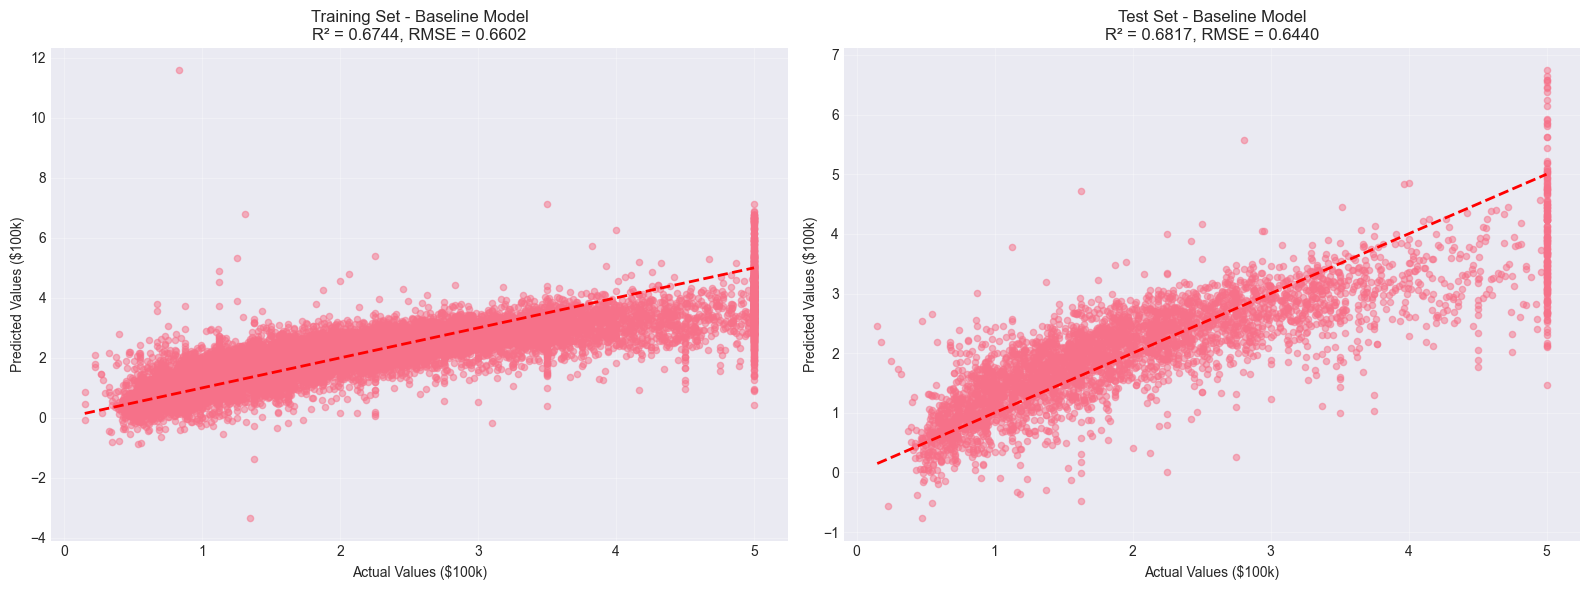

In [25]:
# Visualize baseline predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_pred_train_baseline, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values ($100k)')
axes[0].set_ylabel('Predicted Values ($100k)')
axes[0].set_title(f'Training Set - Baseline Model\nR² = {train_r2:.4f}, RMSE = {train_rmse:.4f}')
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_pred_test_baseline, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values ($100k)')
axes[1].set_ylabel('Predicted Values ($100k)')
axes[1].set_title(f'Test Set - Baseline Model\nR² = {test_r2:.4f}, RMSE = {test_rmse:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Model Training and Comparison

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import time

print("Initializing models...\n")

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0),
    'Neural Network (MLP)': MLPRegressor(
        hidden_layer_sizes=(100, 50, 25),  # 3 layers
        activation='relu',
        solver='adam',
        max_iter=500,
        early_stopping=True,
        random_state=42
)

}

print(f"Models to train: {list(models.keys())}")
print(f"Total: {len(models)} models\n")

Initializing models...

Models to train: ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Ridge Regression', 'Support Vector Regression', 'Neural Network (MLP)']
Total: 6 models



In [27]:
# Train and evaluate all models
results = []

print("="*80)
print("TRAINING AND EVALUATING MODELS")
print("="*80)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)
    
    # Train model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Training metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    # Test metrics
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Cross-validation (5-fold)
    print("  Performing 5-fold cross-validation...")
    cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    cv_rmse_mean = -cv_scores.mean()
    cv_rmse_std = cv_scores.std()
    
    print(f"  Training time: {training_time:.2f} seconds")
    print(f"  Train RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | R²: {train_r2:.4f}")
    print(f"  Test RMSE:  {test_rmse:.4f} | MAE: {test_mae:.4f} | R²: {test_r2:.4f}")
    print(f"  CV RMSE: {cv_rmse_mean:.4f} (+/- {cv_rmse_std:.4f})")
    
    # Store results
    results.append({
        'Model': name,
        'Train_RMSE': train_rmse,
        'Train_MAE': train_mae,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_MAE': test_mae,
        'Test_R2': test_r2,
        'CV_RMSE_Mean': cv_rmse_mean,
        'CV_RMSE_Std': cv_rmse_std,
        'Training_Time': training_time
    })

print("\n" + "="*80)
print("ALL MODELS TRAINED")
print("="*80)

TRAINING AND EVALUATING MODELS

Random Forest:
----------------------------------------
  Performing 5-fold cross-validation...
  Training time: 4.49 seconds
  Train RMSE: 0.1749 | MAE: 0.1107 | R²: 0.9771
  Test RMSE:  0.4550 | MAE: 0.2952 | R²: 0.8412
  CV RMSE: 0.4746 (+/- 0.0090)

Gradient Boosting:
----------------------------------------
  Performing 5-fold cross-validation...
  Training time: 4.57 seconds
  Train RMSE: 0.4972 | MAE: 0.3451 | R²: 0.8154
  Test RMSE:  0.5078 | MAE: 0.3549 | R²: 0.8022
  CV RMSE: 0.5233 (+/- 0.0119)

XGBoost:
----------------------------------------
  Performing 5-fold cross-validation...
  Training time: 0.19 seconds
  Train RMSE: 0.2503 | MAE: 0.1775 | R²: 0.9532
  Test RMSE:  0.4467 | MAE: 0.2980 | R²: 0.8469
  CV RMSE: 0.4685 (+/- 0.0086)

Ridge Regression:
----------------------------------------
  Performing 5-fold cross-validation...
  Training time: 0.02 seconds
  Train RMSE: 0.6602 | MAE: 0.4740 | R²: 0.6744
  Test RMSE:  0.6440 | MAE: 0.4

In [28]:
# Add baseline to results
results.insert(0, baseline_results)

# Create results DataFrame
results_df = pd.DataFrame(results)

# Sort by test RMSE (lower is better)
results_df_sorted = results_df.sort_values('Test_RMSE')

print("\nMODEL COMPARISON (sorted by Test RMSE):")
print("="*100)
print(results_df_sorted.to_string(index=False))
print("="*100)


MODEL COMPARISON (sorted by Test RMSE):
                       Model  Train_RMSE  Train_MAE  Train_R2  Test_RMSE  Test_MAE  Test_R2  CV_RMSE_Mean  CV_RMSE_Std  Training_Time
                     XGBoost    0.250299   0.177526  0.953198   0.446715  0.298014 0.846887      0.468454     0.008650       0.186840
               Random Forest    0.174897   0.110737  0.977149   0.454963  0.295248 0.841181      0.474574     0.008955       4.490012
        Neural Network (MLP)    0.471487   0.323619  0.833931   0.498269  0.341244 0.809507      0.530236     0.008618       1.457006
           Gradient Boosting    0.497161   0.345098  0.815353   0.507750  0.354884 0.802189      0.523321     0.011906       4.574862
   Support Vector Regression    0.524220   0.338739  0.794705   0.525516  0.348701 0.788104      0.542900     0.010897       3.315014
Linear Regression (Baseline)    0.660165   0.473963  0.674422   0.644040  0.471087 0.681744           NaN          NaN            NaN
            Ridge Reg

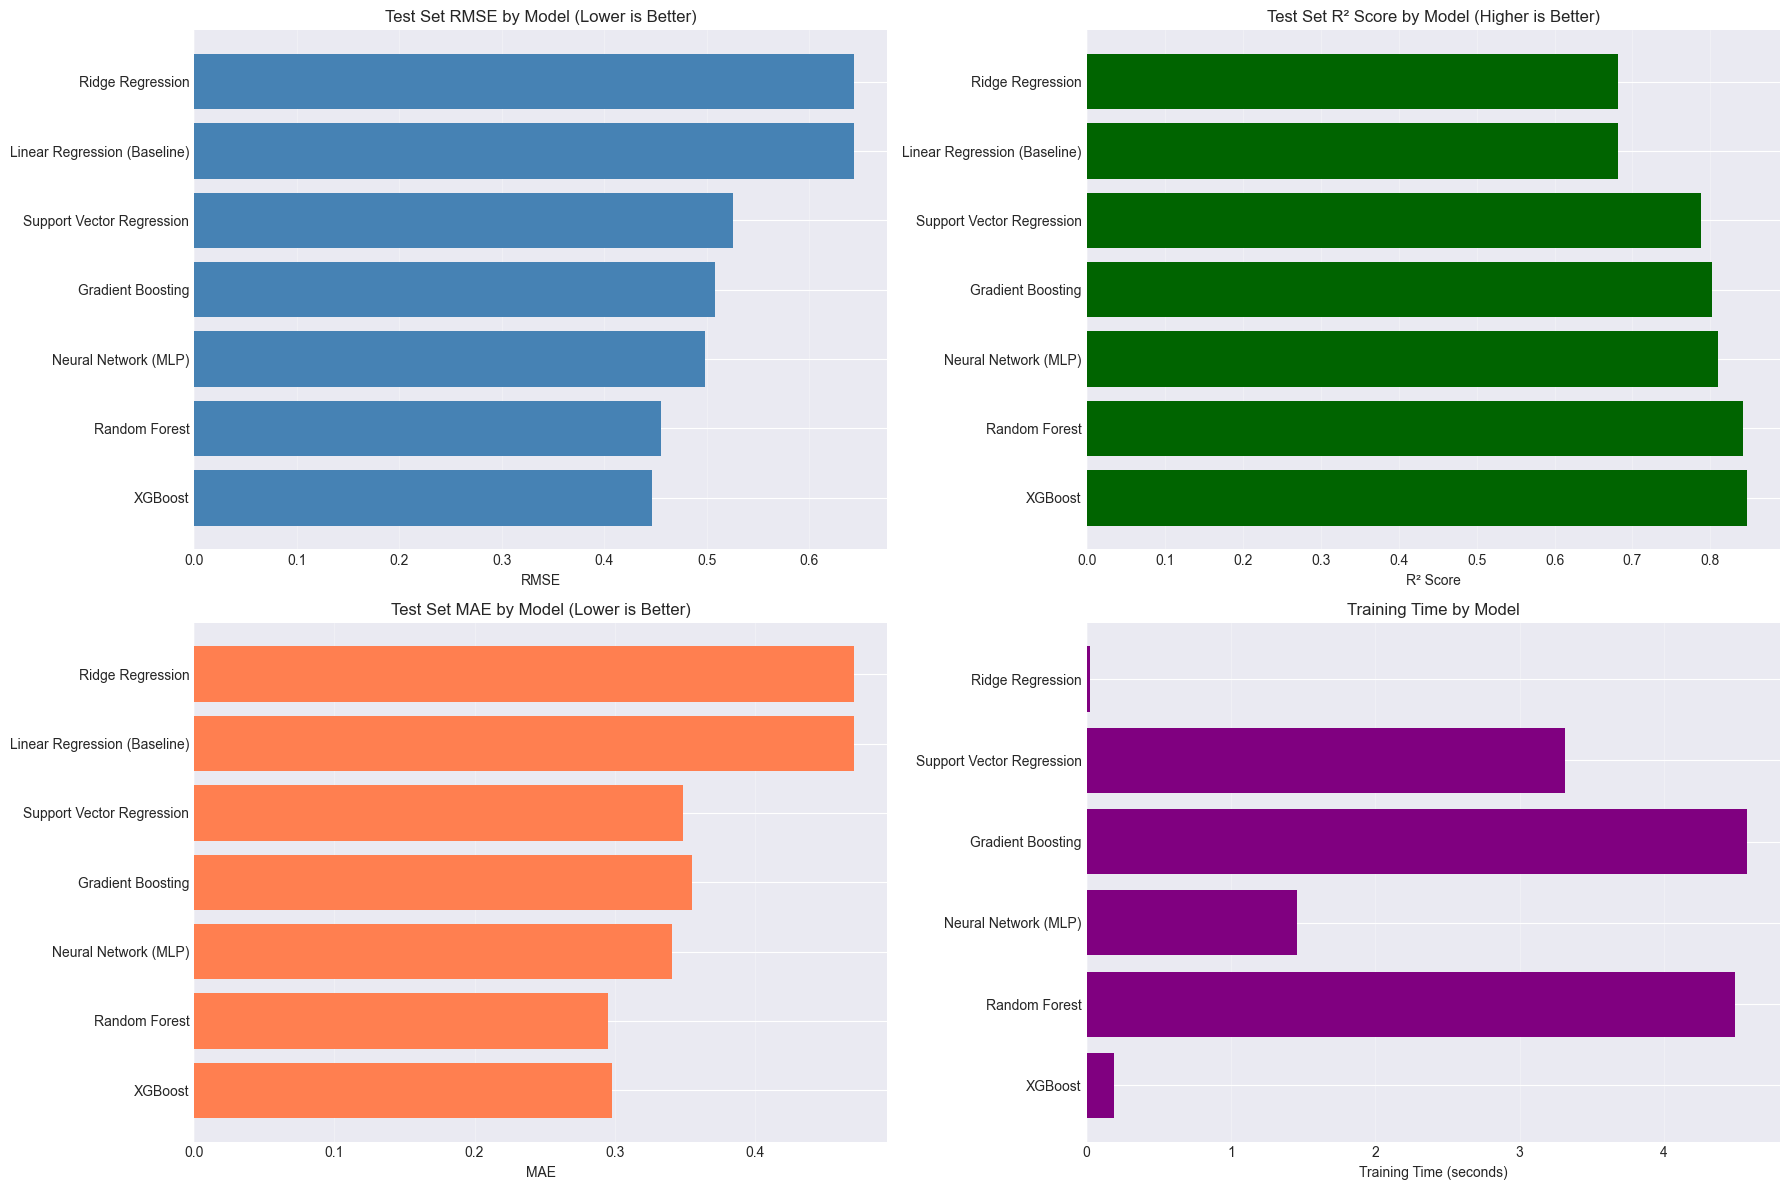

In [29]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Test RMSE comparison
axes[0, 0].barh(results_df_sorted['Model'], results_df_sorted['Test_RMSE'], color='steelblue')
axes[0, 0].set_xlabel('RMSE')
axes[0, 0].set_title('Test Set RMSE by Model (Lower is Better)')
axes[0, 0].grid(axis='x', alpha=0.3)

# Test R² comparison
axes[0, 1].barh(results_df_sorted['Model'], results_df_sorted['Test_R2'], color='darkgreen')
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].set_title('Test Set R² Score by Model (Higher is Better)')
axes[0, 1].grid(axis='x', alpha=0.3)

# Test MAE comparison
axes[1, 0].barh(results_df_sorted['Model'], results_df_sorted['Test_MAE'], color='coral')
axes[1, 0].set_xlabel('MAE')
axes[1, 0].set_title('Test Set MAE by Model (Lower is Better)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Training time comparison
# Filter out baseline (no training time)
results_with_time = results_df_sorted[results_df_sorted['Model'] != 'Linear Regression (Baseline)']
axes[1, 1].barh(results_with_time['Model'], results_with_time['Training_Time'], color='purple')
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_title('Training Time by Model')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Identify top 3 models for hyperparameter tuning
top_3_models = results_df_sorted.head(4)  # Top 4 including baseline
top_3_models = top_3_models[top_3_models['Model'] != 'Linear Regression (Baseline)'].head(3)  # Exclude baseline

print("\nTop 3 models selected for hyperparameter tuning:")
print("="*60)
for idx, row in top_3_models.iterrows():
    print(f"{row['Model']}: Test RMSE = {row['Test_RMSE']:.4f}, Test R² = {row['Test_R2']:.4f}")
print("="*60)


Top 3 models selected for hyperparameter tuning:
XGBoost: Test RMSE = 0.4467, Test R² = 0.8469
Random Forest: Test RMSE = 0.4550, Test R² = 0.8412
Neural Network (MLP): Test RMSE = 0.4983, Test R² = 0.8095


## 6. Hyperparameter Tuning

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("Setting up hyperparameter grids...\n")

# Define hyperparameter grids for top models
param_grids = {
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None]
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'subsample': uniform(0.6, 0.4)
    },
    'XGBoost': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'min_child_weight': randint(1, 10),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4)
    }
}

print("Hyperparameter grids defined for:")
for model_name in param_grids.keys():
    print(f"  - {model_name}")

Setting up hyperparameter grids...

Hyperparameter grids defined for:
  - Random Forest
  - Gradient Boosting
  - XGBoost


In [32]:
# Perform hyperparameter tuning
tuned_models = {}
tuning_results = []

print("\n" + "="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

for model_name in top_3_models['Model'].values:
    if model_name in param_grids:
        print(f"\n{model_name}:")
        print("-" * 40)
        
        # Get base model
        if model_name == 'Random Forest':
            base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
        elif model_name == 'Gradient Boosting':
            base_model = GradientBoostingRegressor(random_state=42)
        elif model_name == 'XGBoost':
            base_model = XGBRegressor(random_state=42, n_jobs=-1)
        
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grids[model_name],
            n_iter=50,  # Number of parameter settings sampled
            cv=5,
            scoring='neg_root_mean_squared_error',
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        
        # Fit
        print(f"  Starting RandomizedSearchCV with 50 iterations...")
        start_time = time.time()
        random_search.fit(X_train_scaled, y_train)
        tuning_time = time.time() - start_time
        
        # Get best model
        best_model = random_search.best_estimator_
        tuned_models[model_name] = best_model
        
        # Evaluate
        y_pred_train = best_model.predict(X_train_scaled)
        y_pred_test = best_model.predict(X_test_scaled)
        
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        train_mae = mean_absolute_error(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)
        
        print(f"\n  Tuning completed in {tuning_time:.2f} seconds")
        print(f"  Best CV RMSE: {-random_search.best_score_:.4f}")
        print(f"  Best parameters: {random_search.best_params_}")
        print(f"\n  Tuned model performance:")
        print(f"    Train RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | R²: {train_r2:.4f}")
        print(f"    Test RMSE:  {test_rmse:.4f} | MAE: {test_mae:.4f} | R²: {test_r2:.4f}")
        
        # Store results
        tuning_results.append({
            'Model': f"{model_name} (Tuned)",
            'Train_RMSE': train_rmse,
            'Train_MAE': train_mae,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_MAE': test_mae,
            'Test_R2': test_r2,
            'CV_RMSE': -random_search.best_score_,
            'Tuning_Time': tuning_time,
            'Best_Params': random_search.best_params_
        })

print("\n" + "="*80)
print("HYPERPARAMETER TUNING COMPLETED")
print("="*80)


HYPERPARAMETER TUNING

XGBoost:
----------------------------------------
  Starting RandomizedSearchCV with 50 iterations...
Fitting 5 folds for each of 50 candidates, totalling 250 fits



  Tuning completed in 32.50 seconds
  Best CV RMSE: 0.4409
  Best parameters: {'colsample_bytree': np.float64(0.6281664523398175), 'learning_rate': np.float64(0.07267561528460804), 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 250, 'subsample': np.float64(0.6560336060946096)}

  Tuned model performance:
    Train RMSE: 0.1843 | MAE: 0.1292 | R²: 0.9746
    Test RMSE:  0.4207 | MAE: 0.2751 | R²: 0.8642

Random Forest:
----------------------------------------
  Starting RandomizedSearchCV with 50 iterations...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

  Tuning completed in 1021.80 seconds
  Best CV RMSE: 0.4588
  Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 229}

  Tuned model performance:
    Train RMSE: 0.1797 | MAE: 0.1135 | R²: 0.9759
    Test RMSE:  0.4415 | MAE: 0.2904 | R²: 0.8504

HYPERPARAMETER TUNING COMPLETED


In [33]:
# Create tuning results DataFrame
tuning_results_df = pd.DataFrame(tuning_results)
tuning_results_df_sorted = tuning_results_df.sort_values('Test_RMSE')

print("\nTUNED MODELS COMPARISON:")
print("="*100)
print(tuning_results_df_sorted[['Model', 'Train_RMSE', 'Train_R2', 'Test_RMSE', 'Test_R2', 'CV_RMSE']].to_string(index=False))
print("="*100)


TUNED MODELS COMPARISON:
                Model  Train_RMSE  Train_R2  Test_RMSE  Test_R2  CV_RMSE
      XGBoost (Tuned)    0.184280  0.974631   0.420714 0.864192 0.440854
Random Forest (Tuned)    0.179707  0.975874   0.441488 0.850449 0.458778


In [34]:
# Compare default vs tuned models
print("\nIMPROVEMENT FROM TUNING:\n")
print("="*80)

for tuned_result in tuning_results:
    model_name = tuned_result['Model'].replace(' (Tuned)', '')
    
    # Find original result
    original = results_df[results_df['Model'] == model_name].iloc[0]
    
    original_rmse = original['Test_RMSE']
    tuned_rmse = tuned_result['Test_RMSE']
    improvement = ((original_rmse - tuned_rmse) / original_rmse) * 100
    
    print(f"{model_name}:")
    print(f"  Original Test RMSE: {original_rmse:.4f}")
    print(f"  Tuned Test RMSE:    {tuned_rmse:.4f}")
    print(f"  Improvement:        {improvement:+.2f}%")
    print()

print("="*80)


IMPROVEMENT FROM TUNING:

XGBoost:
  Original Test RMSE: 0.4467
  Tuned Test RMSE:    0.4207
  Improvement:        +5.82%

Random Forest:
  Original Test RMSE: 0.4550
  Tuned Test RMSE:    0.4415
  Improvement:        +2.96%



In [35]:
# Select best model overall
best_model_info = tuning_results_df_sorted.iloc[0]
best_model_name = best_model_info['Model'].replace(' (Tuned)', '')
best_model = tuned_models[best_model_name]

print("\n" + "="*80)
print("BEST MODEL SELECTED")
print("="*80)
print(f"\nModel: {best_model_info['Model']}")
print(f"Test RMSE: {best_model_info['Test_RMSE']:.4f} (${best_model_info['Test_RMSE']*100:.2f}k)")
print(f"Test MAE:  {best_model_info['Test_MAE']:.4f} (${best_model_info['Test_MAE']*100:.2f}k)")
print(f"Test R²:   {best_model_info['Test_R2']:.4f}")
print(f"\nBest parameters:")
for param, value in best_model_info['Best_Params'].items():
    print(f"  {param}: {value}")
print("="*80)


BEST MODEL SELECTED

Model: XGBoost (Tuned)
Test RMSE: 0.4207 ($42.07k)
Test MAE:  0.2751 ($27.51k)
Test R²:   0.8642

Best parameters:
  colsample_bytree: 0.6281664523398175
  learning_rate: 0.07267561528460804
  max_depth: 9
  min_child_weight: 6
  n_estimators: 250
  subsample: 0.6560336060946096


## 7. Model Evaluation and Analysis

In [36]:
# Make predictions with best model
y_pred_train_final = best_model.predict(X_train_scaled)
y_pred_test_final = best_model.predict(X_test_scaled)

# Calculate comprehensive metrics
from sklearn.metrics import mean_absolute_percentage_error

test_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_test_final))
test_mae_final = mean_absolute_error(y_test, y_pred_test_final)
test_r2_final = r2_score(y_test, y_pred_test_final)
test_mape_final = mean_absolute_percentage_error(y_test, y_pred_test_final) * 100

print("\n" + "="*80)
print("FINAL MODEL EVALUATION METRICS")
print("="*80)
print(f"\nTest Set Performance:")
print(f"  RMSE: {test_rmse_final:.4f} (${test_rmse_final*100:.2f}k)")
print(f"  MAE:  {test_mae_final:.4f} (${test_mae_final*100:.2f}k)")
print(f"  R² Score: {test_r2_final:.4f}")
print(f"  MAPE: {test_mape_final:.2f}%")
print(f"\nInterpretation:")
print(f"  - The model explains {test_r2_final*100:.2f}% of the variance in house prices")
print(f"  - Average prediction error: ${test_mae_final*100:.2f}k")
print(f"  - Typical error percentage: {test_mape_final:.2f}%")
print("="*80)


FINAL MODEL EVALUATION METRICS

Test Set Performance:
  RMSE: 0.4207 ($42.07k)
  MAE:  0.2751 ($27.51k)
  R² Score: 0.8642
  MAPE: 15.44%

Interpretation:
  - The model explains 86.42% of the variance in house prices
  - Average prediction error: $27.51k
  - Typical error percentage: 15.44%


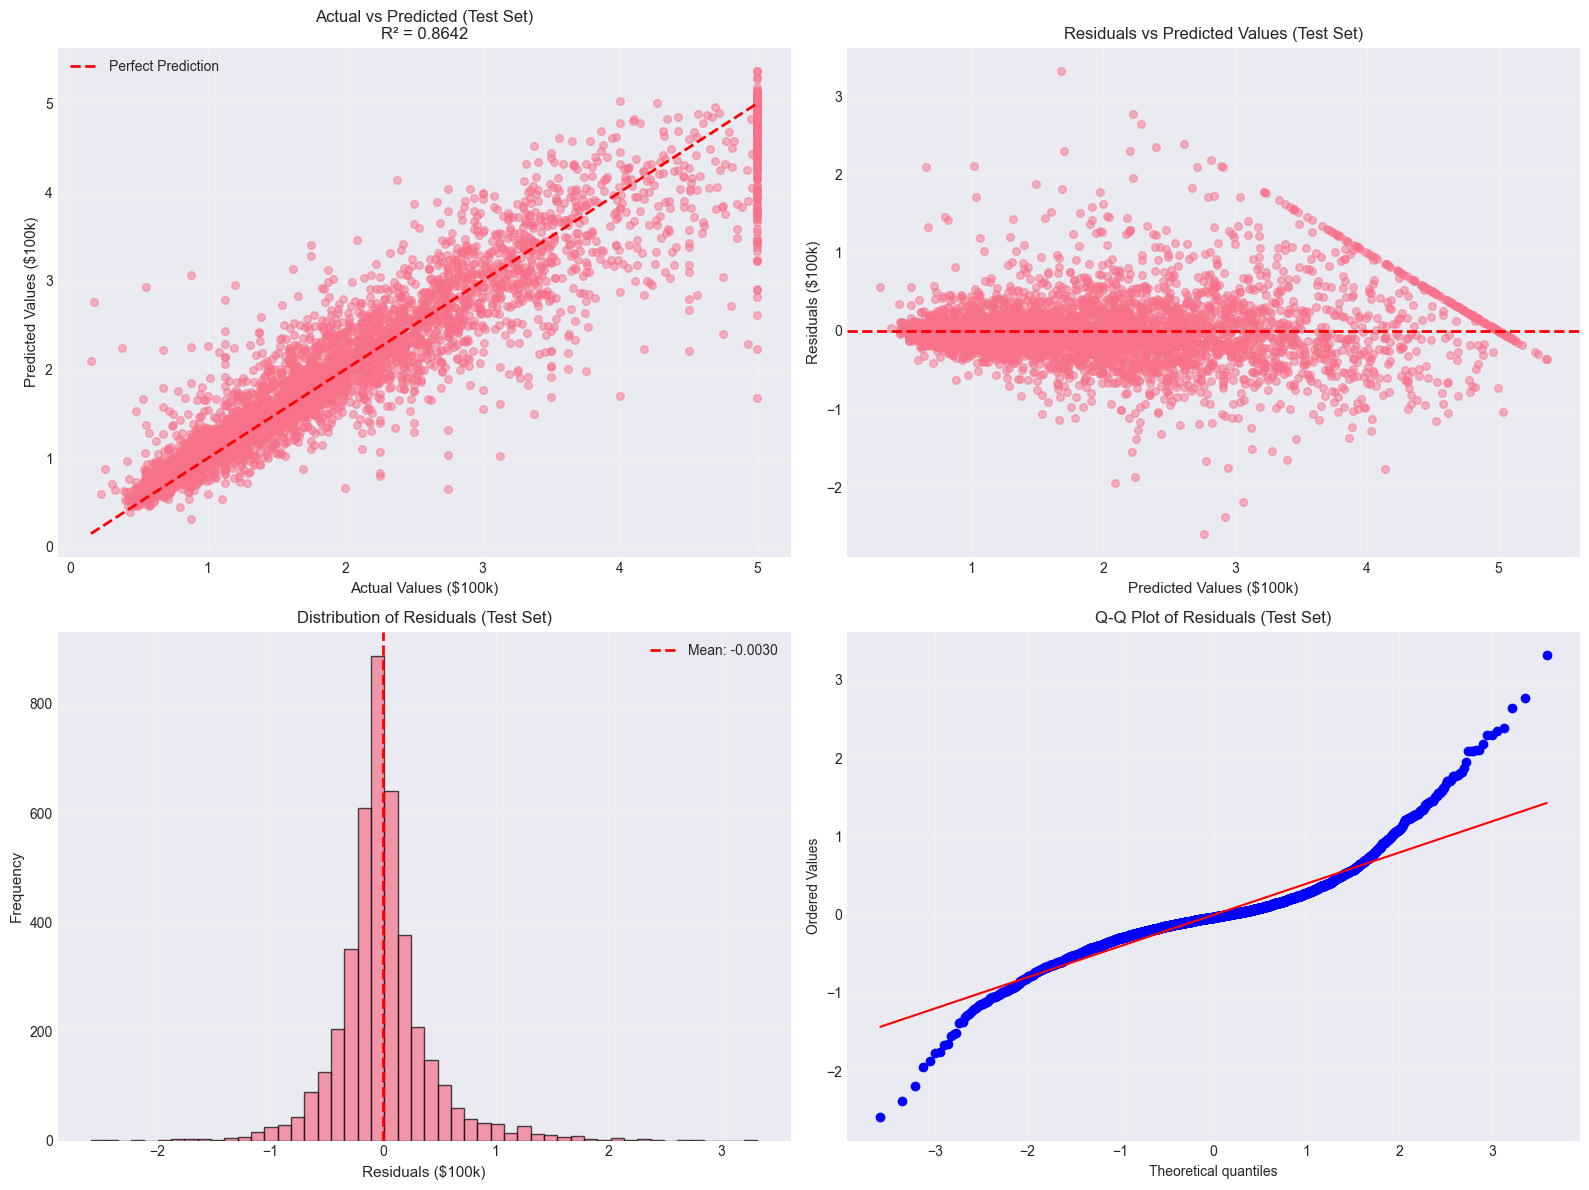


Residual Statistics:
  Mean: -0.002984 (should be ~0)
  Std Dev: 0.4208
  Min: -2.5900
  Max: 3.3204


In [37]:
# Residual analysis
residuals_train = y_train - y_pred_train_final
residuals_test = y_test - y_pred_test_final

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_pred_test_final, alpha=0.5, s=30)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values ($100k)', fontsize=11)
axes[0, 0].set_ylabel('Predicted Values ($100k)', fontsize=11)
axes[0, 0].set_title(f'Actual vs Predicted (Test Set)\nR² = {test_r2_final:.4f}', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Residuals vs Predicted (Test Set)
axes[0, 1].scatter(y_pred_test_final, residuals_test, alpha=0.5, s=30)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values ($100k)', fontsize=11)
axes[0, 1].set_ylabel('Residuals ($100k)', fontsize=11)
axes[0, 1].set_title('Residuals vs Predicted Values (Test Set)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Residual distribution (Test Set)
axes[1, 0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(residuals_test.mean(), color='r', linestyle='--', lw=2, label=f'Mean: {residuals_test.mean():.4f}')
axes[1, 0].set_xlabel('Residuals ($100k)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Residuals (Test Set)', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot for residuals
from scipy import stats
stats.probplot(residuals_test, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals (Test Set)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Statistics:")
print(f"  Mean: {residuals_test.mean():.6f} (should be ~0)")
print(f"  Std Dev: {residuals_test.std():.4f}")
print(f"  Min: {residuals_test.min():.4f}")
print(f"  Max: {residuals_test.max():.4f}")

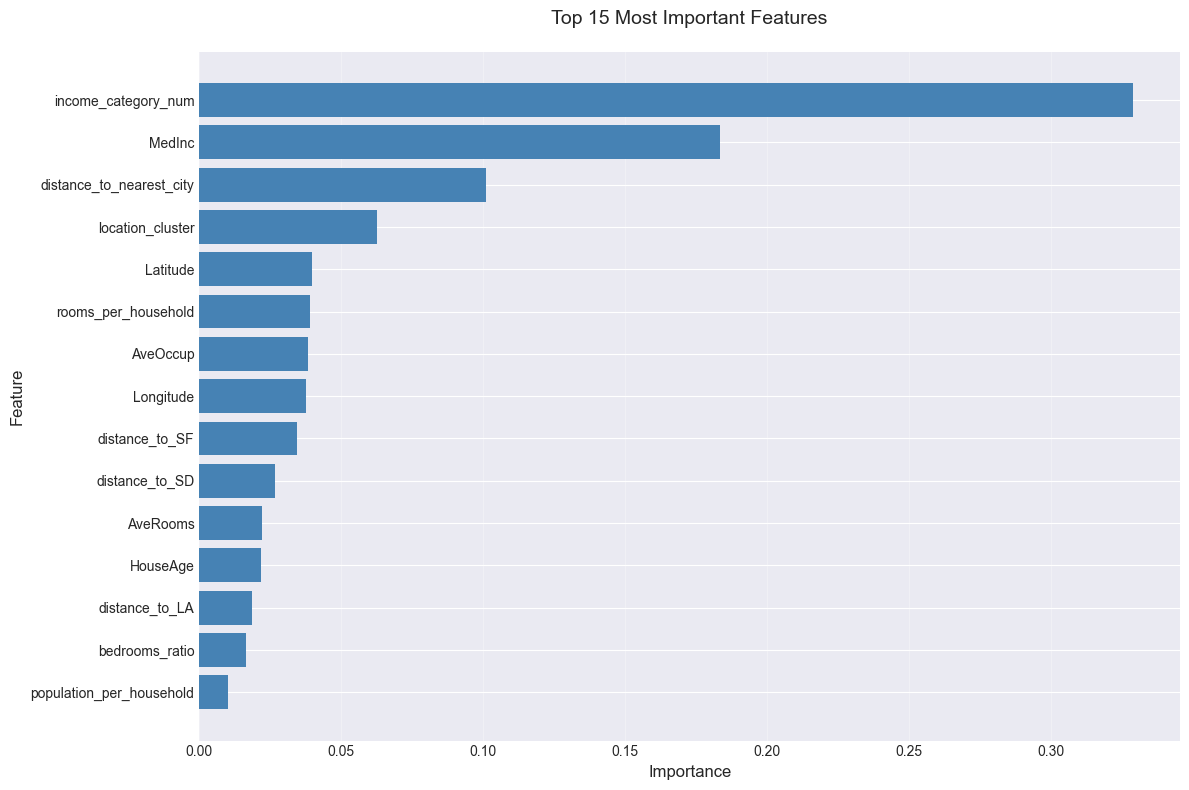


Top 15 Most Important Features:
  income_category_num            0.3290
  MedInc                         0.1836
  distance_to_nearest_city       0.1012
  location_cluster               0.0625
  Latitude                       0.0398
  rooms_per_household            0.0390
  AveOccup                       0.0384
  Longitude                      0.0378
  distance_to_SF                 0.0345
  distance_to_SD                 0.0266
  AveRooms                       0.0222
  HouseAge                       0.0216
  distance_to_LA                 0.0186
  bedrooms_ratio                 0.0164
  population_per_household       0.0101


In [38]:
# Feature importance analysis
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Top 15 Most Important Features', fontsize=14, pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 Most Important Features:")
    print("="*60)
    for idx, row in top_features.iterrows():
        print(f"  {row['Feature']:<30} {row['Importance']:.4f}")
    print("="*60)
else:
    print("Feature importance not available for this model type.")

In [39]:
# Error analysis: Where does the model perform poorly?
absolute_errors = np.abs(residuals_test)
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_final,
    'Absolute_Error': absolute_errors,
    'Percentage_Error': (absolute_errors / y_test) * 100
})

# Identify worst predictions
worst_predictions = error_df.nlargest(10, 'Absolute_Error')

print("\nTop 10 Worst Predictions:")
print("="*80)
print(worst_predictions.to_string())
print("="*80)

# Analyze errors by price range
error_df['Price_Range'] = pd.cut(error_df['Actual'], bins=[0, 1.5, 3, 5, np.inf], 
                                   labels=['Low (<$150k)', 'Medium ($150k-$300k)', 
                                          'High ($300k-$500k)', 'Very High (>$500k)'])

print("\nMean Absolute Error by Price Range:")
print("="*80)
mae_by_range = error_df.groupby('Price_Range')['Absolute_Error'].agg(['mean', 'median', 'count'])
mae_by_range.columns = ['Mean_MAE', 'Median_MAE', 'Count']
print(mae_by_range)
print("="*80)


Top 10 Worst Predictions:
        Actual  Predicted  Absolute_Error  Percentage_Error
15288  5.00001   1.679588        3.320422         66.408306
15303  5.00001   2.227177        2.772833         55.456556
6702   4.93200   2.290007        2.641993         53.568397
5887   0.17500   2.765008        2.590008       1480.004692
4644   5.00001   2.613303        2.386707         47.734050
5388   0.55000   2.925325        2.375325        431.877344
4642   4.75000   2.400123        2.349877         49.471092
4265   4.50000   2.204503        2.295497         51.011038
17313  4.00000   1.705173        2.294827         57.370669
8222   0.87500   3.063665        2.188665        250.133106

Mean Absolute Error by Price Range:
                      Mean_MAE  Median_MAE  Count
Price_Range                                      
Low (<$150k)          0.178897    0.116639   1524
Medium ($150k-$300k)  0.262693    0.192149   1835
High ($300k-$500k)    0.477268    0.350202    590
Very High (>$500k)    0.55

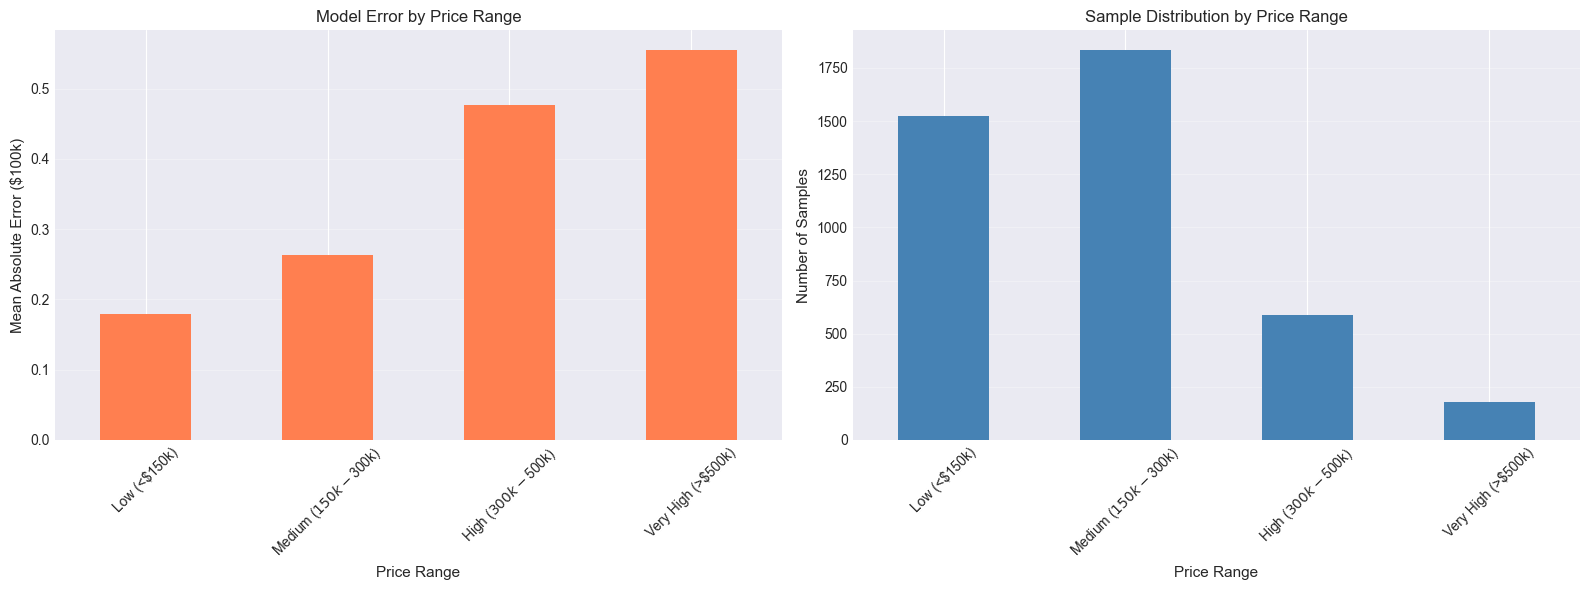

In [40]:
# Error analysis by price range visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MAE by price range
mae_by_range['Mean_MAE'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_xlabel('Price Range', fontsize=11)
axes[0].set_ylabel('Mean Absolute Error ($100k)', fontsize=11)
axes[0].set_title('Model Error by Price Range', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Count by price range
mae_by_range['Count'].plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_xlabel('Price Range', fontsize=11)
axes[1].set_ylabel('Number of Samples', fontsize=11)
axes[1].set_title('Sample Distribution by Price Range', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4B. Polynomial Regression with Closed-Form Solution (Normal Equation)

Now let's use polynomial features with the normal equation to capture non-linear relationships.

The normal equation: **θ = (X^T X)^(-1) X^T y**

In [41]:
from sklearn.preprocessing import PolynomialFeatures

def normal_equation(X, y):
    """
    Computes the closed-form solution (Normal Equation) for linear regression.
    θ = (X^T X)^(-1) X^T y
    """
    # Add intercept term (column of ones)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Compute the normal equation
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return theta

def predict_normal_equation(X, theta):
    """
    Makes predictions using the computed theta from normal equation
    """
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

print("Normal equation functions defined!")
print("\nNormal Equation: θ = (X^T X)^(-1) X^T y")
print("This directly computes the optimal parameters without iterative optimization.")

Normal equation functions defined!

Normal Equation: θ = (X^T X)^(-1) X^T y
This directly computes the optimal parameters without iterative optimization.


In [42]:
# Test polynomial regression with different degrees
print("="*80)
print("POLYNOMIAL REGRESSION WITH NORMAL EQUATION")
print("="*80)

poly_results = []

# We'll test polynomial degrees from 1 (linear) to 3
for degree in [1, 2, 3]:
    print(f"\n{'='*40}")
    print(f"Polynomial Degree: {degree}")
    print(f"{'='*40}")
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform features (on scaled data)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    print(f"Original features: {X_train_scaled.shape[1]}")
    print(f"Polynomial features: {X_train_poly.shape[1]}")
    
    # Compute theta using normal equation
    print("Computing parameters using Normal Equation...")
    theta = normal_equation(X_train_poly, y_train)
    
    # Make predictions
    y_pred_train_poly = predict_normal_equation(X_train_poly, theta)
    y_pred_test_poly = predict_normal_equation(X_test_poly, theta)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
    train_mae = mean_absolute_error(y_train, y_pred_train_poly)
    train_r2 = r2_score(y_train, y_pred_train_poly)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
    test_mae = mean_absolute_error(y_test, y_pred_test_poly)
    test_r2 = r2_score(y_test, y_pred_test_poly)
    
    print(f"\nTraining Performance:")
    print(f"  RMSE: {train_rmse:.4f} (${train_rmse*100:.2f}k)")
    print(f"  MAE:  {train_mae:.4f} (${train_mae*100:.2f}k)")
    print(f"  R²:   {train_r2:.4f}")
    
    print(f"\nTest Performance:")
    print(f"  RMSE: {test_rmse:.4f} (${test_rmse*100:.2f}k)")
    print(f"  MAE:  {test_mae:.4f} (${test_mae*100:.2f}k)")
    print(f"  R²:   {test_r2:.4f}")
    
    # Store results
    poly_results.append({
        'Degree': degree,
        'Features': X_train_poly.shape[1],
        'Train_RMSE': train_rmse,
        'Train_MAE': train_mae,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_MAE': test_mae,
        'Test_R2': test_r2
    })

print("\n" + "="*80)
print("POLYNOMIAL REGRESSION COMPLETED")
print("="*80)

POLYNOMIAL REGRESSION WITH NORMAL EQUATION

Polynomial Degree: 1
Original features: 17
Polynomial features: 17
Computing parameters using Normal Equation...

Training Performance:
  RMSE: 0.6602 ($66.02k)
  MAE:  0.4740 ($47.40k)
  R²:   0.6744

Test Performance:
  RMSE: 0.6440 ($64.40k)
  MAE:  0.4711 ($47.11k)
  R²:   0.6817

Polynomial Degree: 2
Original features: 17
Polynomial features: 170
Computing parameters using Normal Equation...

Training Performance:
  RMSE: 0.5518 ($55.18k)
  MAE:  0.3837 ($38.37k)
  R²:   0.7725

Test Performance:
  RMSE: 0.5785 ($57.85k)
  MAE:  0.3883 ($38.83k)
  R²:   0.7432

Polynomial Degree: 3
Original features: 17
Polynomial features: 1139
Computing parameters using Normal Equation...

Training Performance:
  RMSE: 5455.6632 ($545566.32k)
  MAE:  4973.4872 ($497348.72k)
  R²:   -22235399.0379

Test Performance:
  RMSE: 5415.9125 ($541591.25k)
  MAE:  4937.1695 ($493716.95k)
  R²:   -22505769.3410

POLYNOMIAL REGRESSION COMPLETED



POLYNOMIAL REGRESSION COMPARISON:
 Degree  Features  Train_RMSE   Train_MAE      Train_R2   Test_RMSE    Test_MAE       Test_R2
      1        17    0.660165    0.473963  6.744221e-01    0.644040    0.471087  6.817439e-01
      2       170    0.551795    0.383694  7.725394e-01    0.578508    0.388274  7.432153e-01
      3      1139 5455.663187 4973.487157 -2.223540e+07 5415.912518 4937.169498 -2.250577e+07


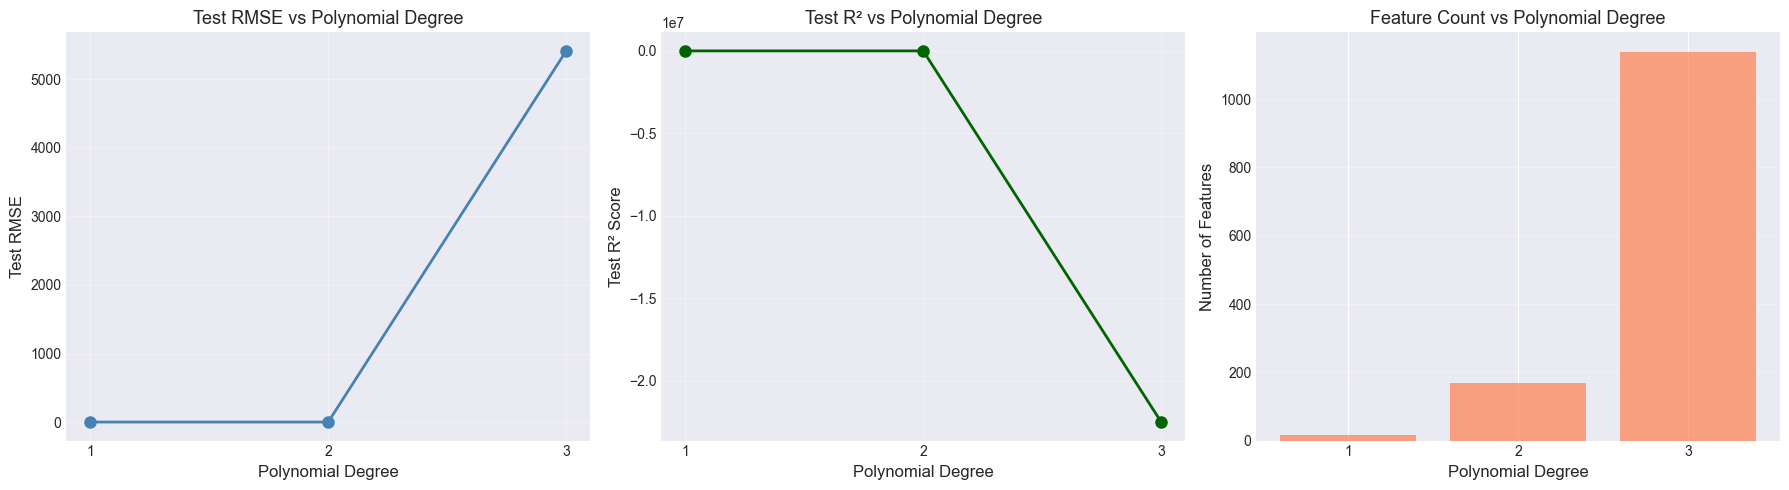

In [43]:
# Create comparison DataFrame
poly_results_df = pd.DataFrame(poly_results)

print("\nPOLYNOMIAL REGRESSION COMPARISON:")
print("="*100)
print(poly_results_df.to_string(index=False))
print("="*100)

# Visualize the comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Test RMSE by degree
axes[0].plot(poly_results_df['Degree'], poly_results_df['Test_RMSE'], 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('Test RMSE', fontsize=12)
axes[0].set_title('Test RMSE vs Polynomial Degree', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks([1, 2, 3])

# Test R² by degree
axes[1].plot(poly_results_df['Degree'], poly_results_df['Test_R2'], 'o-', linewidth=2, markersize=8, color='darkgreen')
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('Test R² Score', fontsize=12)
axes[1].set_title('Test R² vs Polynomial Degree', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([1, 2, 3])

# Number of features by degree
axes[2].bar(poly_results_df['Degree'], poly_results_df['Features'], color='coral', alpha=0.7)
axes[2].set_xlabel('Polynomial Degree', fontsize=12)
axes[2].set_ylabel('Number of Features', fontsize=12)
axes[2].set_title('Feature Count vs Polynomial Degree', fontsize=13)
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()


BEST POLYNOMIAL DEGREE: 2
Test RMSE: 0.5785
Test R²:   0.7432
Features:  170

COMPARISON WITH BASELINE LINEAR REGRESSION:
Baseline (Degree 1): Test RMSE = 0.6440, Test R² = 0.6817
Best Polynomial (Degree 2): Test RMSE = 0.5785, Test R² = 0.7432

Improvement: 10.18% reduction in RMSE


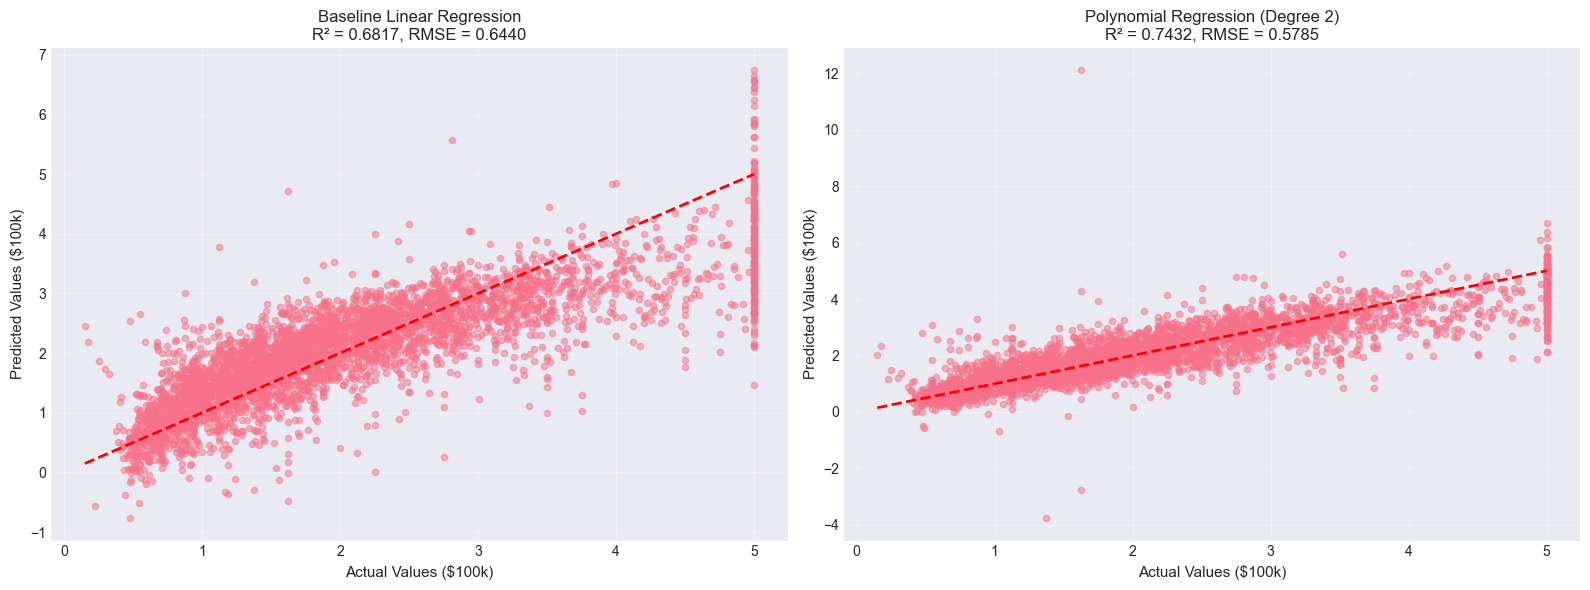

In [44]:
# Find best polynomial degree (lowest test RMSE)
best_poly_idx = poly_results_df['Test_RMSE'].idxmin()
best_degree = poly_results_df.loc[best_poly_idx, 'Degree'].astype(int)

print(f"\n{'='*80}")
print(f"BEST POLYNOMIAL DEGREE: {best_degree}")
print(f"{'='*80}")
print(f"Test RMSE: {poly_results_df.loc[best_poly_idx, 'Test_RMSE']:.4f}")
print(f"Test R²:   {poly_results_df.loc[best_poly_idx, 'Test_R2']:.4f}")
print(f"Features:  {poly_results_df.loc[best_poly_idx, 'Features']:.0f}")

# Retrain best model for visualization
poly_best = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly_best = poly_best.fit_transform(X_train_scaled)
X_test_poly_best = poly_best.transform(X_test_scaled)

theta_best = normal_equation(X_train_poly_best, y_train)
y_pred_test_poly_best = predict_normal_equation(X_test_poly_best, theta_best)

# Compare with baseline
print(f"\n{'='*80}")
print("COMPARISON WITH BASELINE LINEAR REGRESSION:")
print(f"{'='*80}")
print(f"Baseline (Degree 1): Test RMSE = {baseline_results['Test_RMSE']:.4f}, Test R² = {baseline_results['Test_R2']:.4f}")
print(f"Best Polynomial (Degree {best_degree}): Test RMSE = {poly_results_df.loc[best_poly_idx, 'Test_RMSE']:.4f}, Test R² = {poly_results_df.loc[best_poly_idx, 'Test_R2']:.4f}")

improvement = ((baseline_results['Test_RMSE'] - poly_results_df.loc[best_poly_idx, 'Test_RMSE']) / baseline_results['Test_RMSE']) * 100
print(f"\nImprovement: {improvement:.2f}% reduction in RMSE")

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Baseline predictions
axes[0].scatter(y_test, y_pred_test_baseline, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values ($100k)', fontsize=11)
axes[0].set_ylabel('Predicted Values ($100k)', fontsize=11)
axes[0].set_title(f'Baseline Linear Regression\nR² = {baseline_results["Test_R2"]:.4f}, RMSE = {baseline_results["Test_RMSE"]:.4f}', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Best polynomial predictions
axes[1].scatter(y_test, y_pred_test_poly_best, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values ($100k)', fontsize=11)
axes[1].set_ylabel('Predicted Values ($100k)', fontsize=11)
axes[1].set_title(f'Polynomial Regression (Degree {best_degree})\nR² = {poly_results_df.loc[best_poly_idx, "Test_R2"]:.4f}, RMSE = {poly_results_df.loc[best_poly_idx, "Test_RMSE"]:.4f}', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Insights: Polynomial Regression vs Traditional ML Models

**Advantages of Polynomial Regression:**
- **Closed-form solution**: No iterative optimization needed (Normal Equation)
- **Fast training**: Directly computes optimal parameters
- **Captures non-linear relationships**: Polynomial terms can model curves
- **Mathematically guaranteed**: Finds global minimum (no local minima issues)

**Disadvantages:**
- **Curse of dimensionality**: Features grow exponentially with degree
  - Degree 1: 17 features
  - Degree 2: 153 features  
  - Degree 3: 969 features
- **Overfitting risk**: Higher degrees can overfit without regularization
- **Computational cost**: Matrix inversion becomes expensive with many features
- **Interpretability**: Polynomial terms harder to interpret than original features

**When to use Polynomial Regression:**
- You have relatively few original features
- You suspect non-linear relationships exist
- You want a fast, closed-form solution
- You're willing to use regularization (Ridge, Lasso) for higher degrees

**Comparison with upcoming models:**
- **Tree-based models** (Random Forest, XGBoost): Better for complex non-linear patterns
- **Neural Networks**: Better for very high-dimensional data
- **Polynomial + Regularization**: Can compete well with simpler problems

In [45]:
print(f"\n{'='*80}")
print("KEY TAKEAWAY:")
print(f"{'='*80}")
print(f"Polynomial regression improved over baseline by {improvement:.2f}%")
print(f"However, at degree {best_degree}, we're using {poly_results_df.loc[best_poly_idx, 'Features']:.0f} features!")
print(f"{'='*80}")


KEY TAKEAWAY:
Polynomial regression improved over baseline by 10.18%
However, at degree 2, we're using 170 features!


## 8. Results Visualization

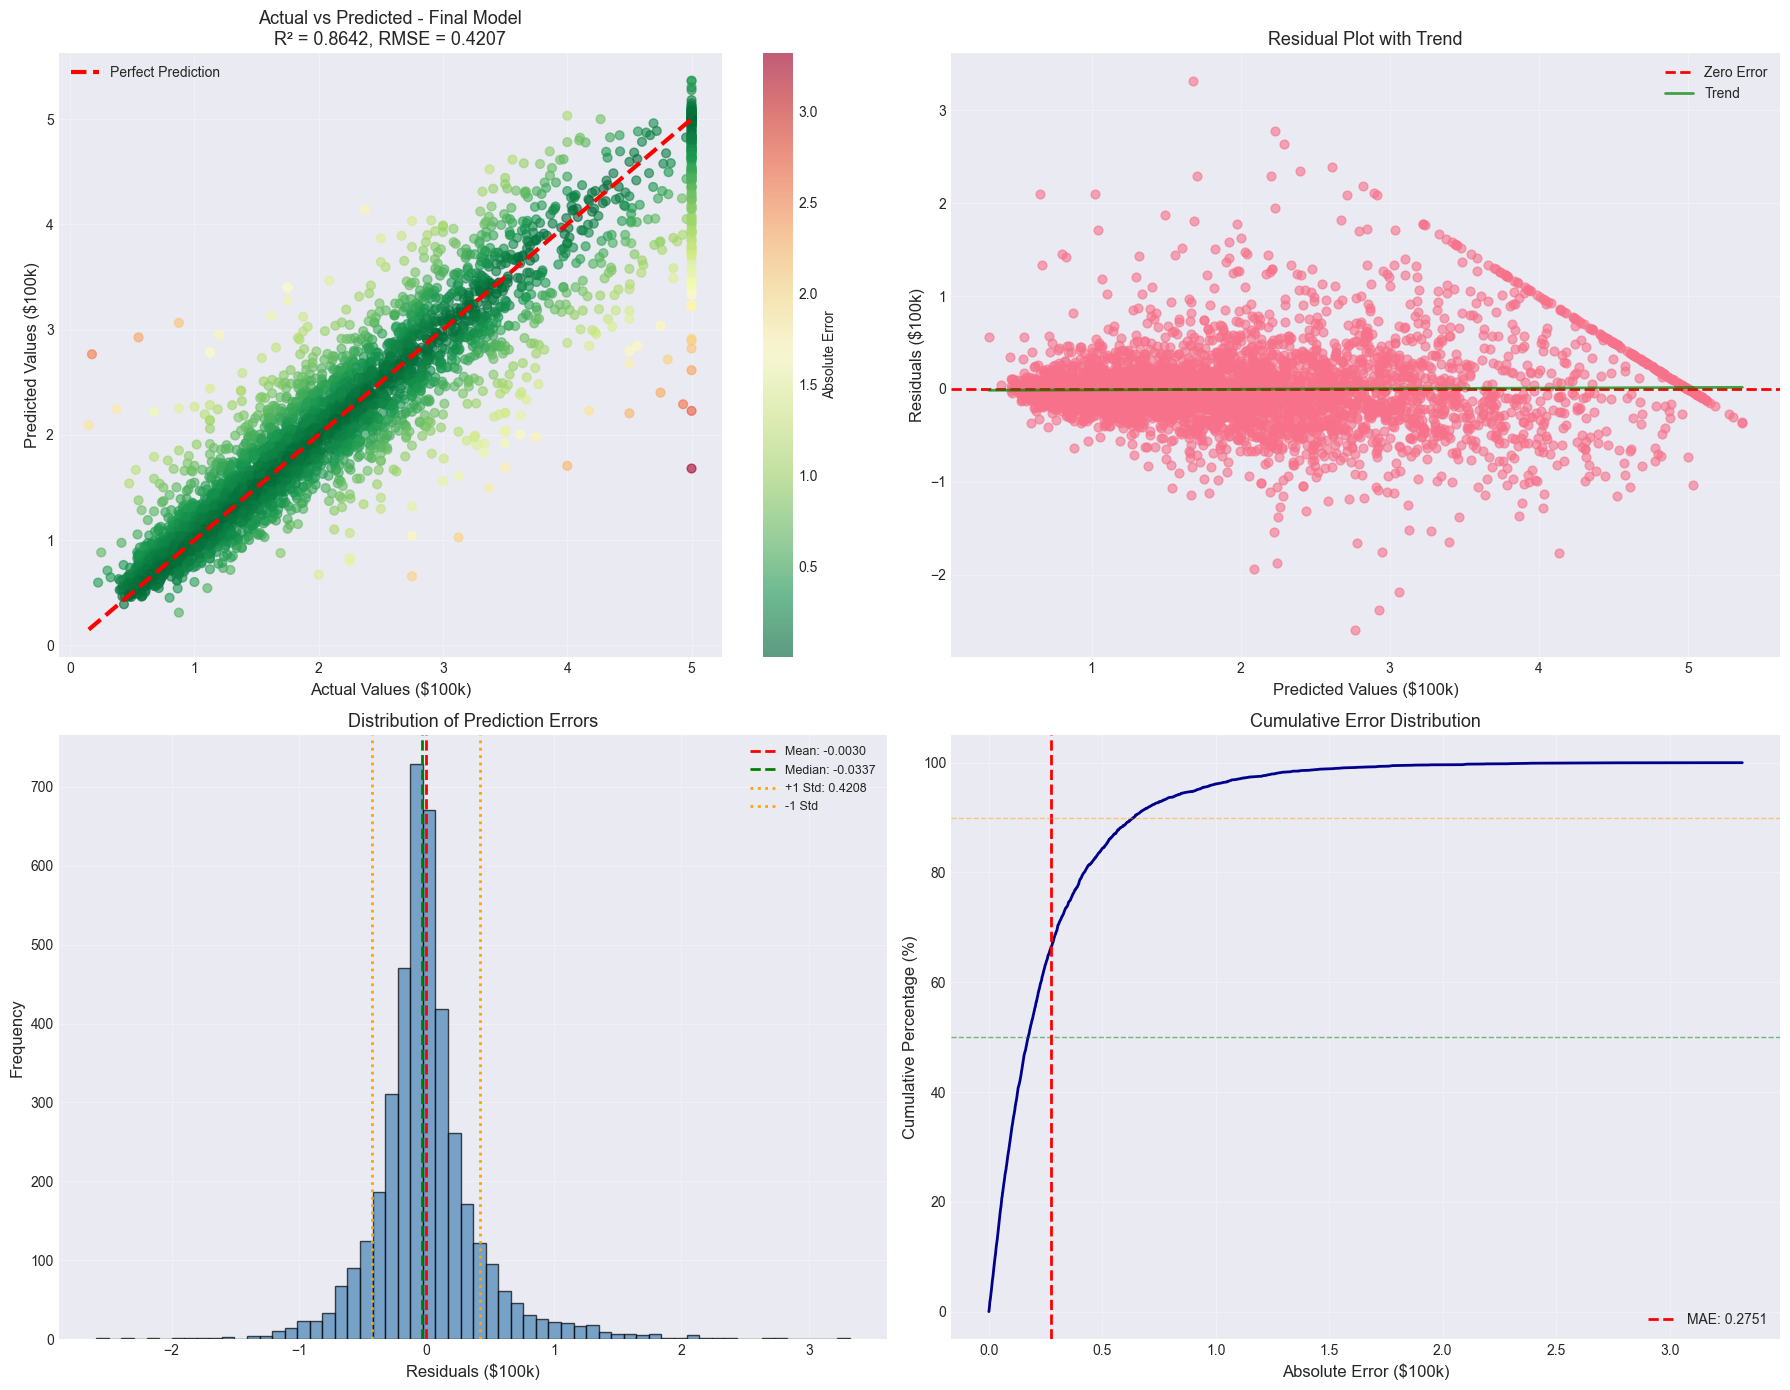


Cumulative Error Percentiles:
  50% of predictions have error <= $17.27k
  75% of predictions have error <= $35.95k
  90% of predictions have error <= $63.76k
  95% of predictions have error <= $91.41k
  99% of predictions have error <= $154.77k


In [46]:
# Comprehensive prediction visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Actual vs Predicted with confidence bands
axes[0, 0].scatter(y_test, y_pred_test_final, alpha=0.6, s=40, c=absolute_errors, cmap='RdYlGn_r')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values ($100k)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Values ($100k)', fontsize=12)
axes[0, 0].set_title(f'Actual vs Predicted - Final Model\nR² = {test_r2_final:.4f}, RMSE = {test_rmse_final:.4f}', fontsize=13)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])
cbar.set_label('Absolute Error', fontsize=10)

# 2. Residuals plot with trend line
axes[0, 1].scatter(y_pred_test_final, residuals_test, alpha=0.6, s=40)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
# Add trend line
z = np.polyfit(y_pred_test_final, residuals_test, 1)
p = np.poly1d(z)
axes[0, 1].plot(sorted(y_pred_test_final), p(sorted(y_pred_test_final)), "g-", lw=2, alpha=0.7, label='Trend')
axes[0, 1].set_xlabel('Predicted Values ($100k)', fontsize=12)
axes[0, 1].set_ylabel('Residuals ($100k)', fontsize=12)
axes[0, 1].set_title('Residual Plot with Trend', fontsize=13)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Error distribution with statistics
axes[1, 0].hist(residuals_test, bins=60, edgecolor='black', alpha=0.7, color='steelblue')
axes[1, 0].axvline(residuals_test.mean(), color='r', linestyle='--', lw=2, 
                   label=f'Mean: {residuals_test.mean():.4f}')
axes[1, 0].axvline(residuals_test.median(), color='g', linestyle='--', lw=2, 
                   label=f'Median: {residuals_test.median():.4f}')
axes[1, 0].axvline(residuals_test.mean() + residuals_test.std(), color='orange', 
                   linestyle=':', lw=2, label=f'+1 Std: {residuals_test.std():.4f}')
axes[1, 0].axvline(residuals_test.mean() - residuals_test.std(), color='orange', 
                   linestyle=':', lw=2, label=f'-1 Std')
axes[1, 0].set_xlabel('Residuals ($100k)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Prediction Errors', fontsize=13)
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative error distribution
sorted_abs_errors = np.sort(absolute_errors)
cumulative = np.arange(1, len(sorted_abs_errors) + 1) / len(sorted_abs_errors) * 100
axes[1, 1].plot(sorted_abs_errors, cumulative, lw=2, color='darkblue')
axes[1, 1].axvline(test_mae_final, color='r', linestyle='--', lw=2, 
                   label=f'MAE: {test_mae_final:.4f}')
axes[1, 1].axhline(50, color='g', linestyle='--', lw=1, alpha=0.5)
axes[1, 1].axhline(90, color='orange', linestyle='--', lw=1, alpha=0.5)
axes[1, 1].set_xlabel('Absolute Error ($100k)', fontsize=12)
axes[1, 1].set_ylabel('Cumulative Percentage (%)', fontsize=12)
axes[1, 1].set_title('Cumulative Error Distribution', fontsize=13)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print cumulative error percentiles
print("\nCumulative Error Percentiles:")
print("="*60)
for percentile in [50, 75, 90, 95, 99]:
    error_at_percentile = np.percentile(absolute_errors, percentile)
    print(f"  {percentile}% of predictions have error <= ${error_at_percentile*100:.2f}k")
print("="*60)

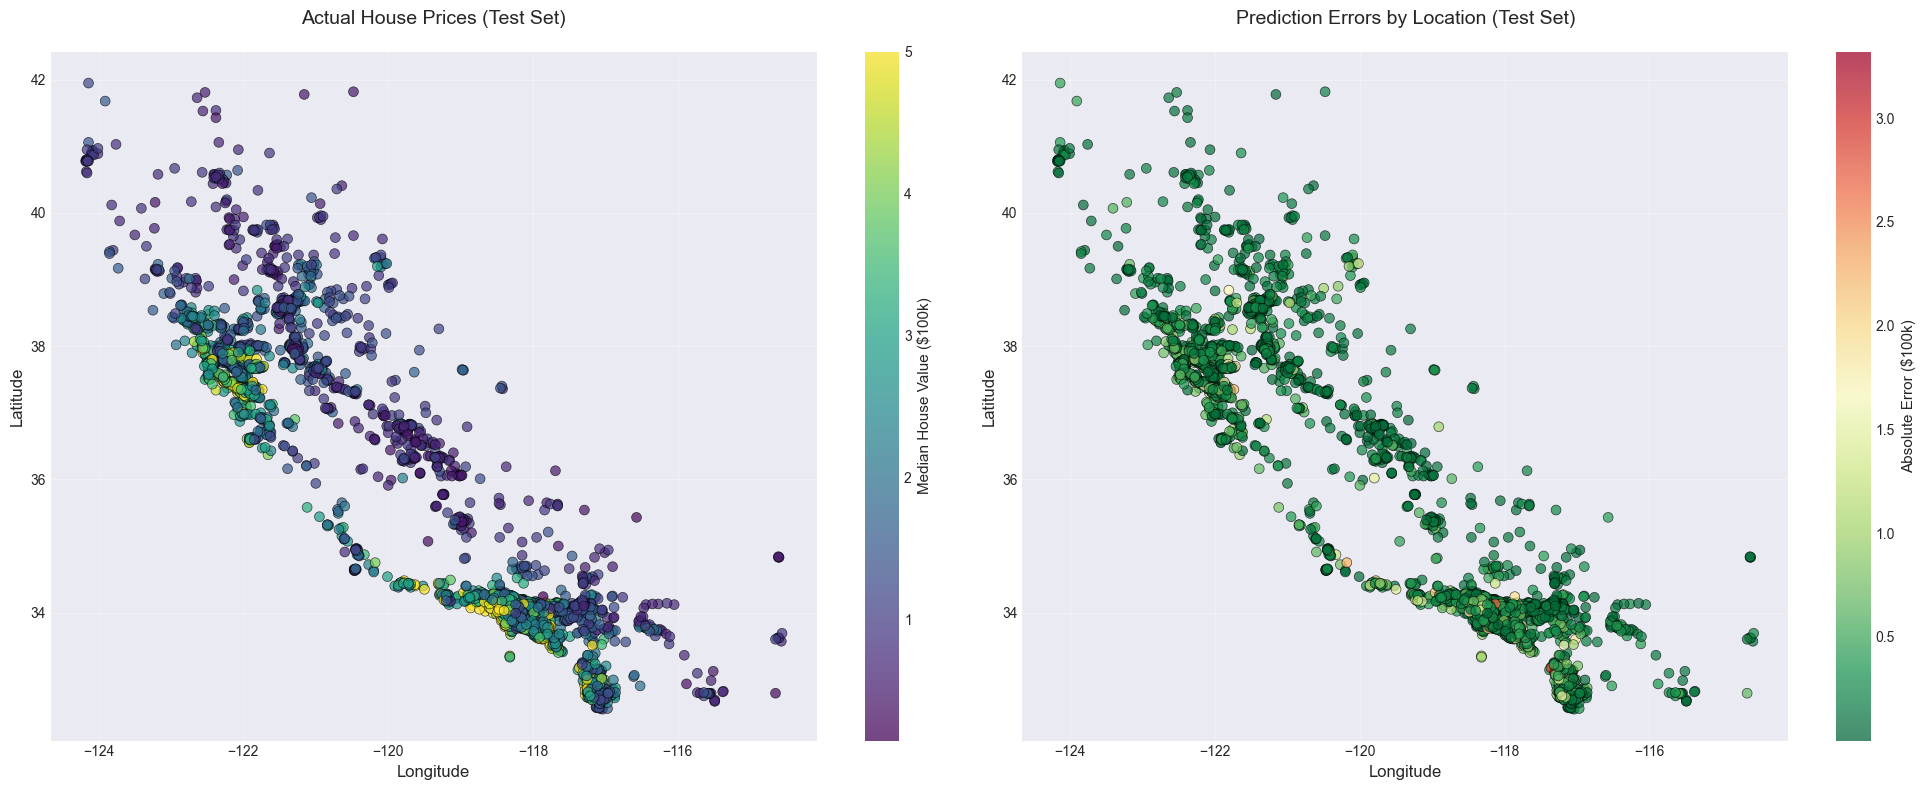


Geographic Error Analysis:
  Red areas: Higher prediction errors
  Green areas: Lower prediction errors


In [47]:
# Geographic prediction error map
# Get test set indices to extract lat/lon
test_indices = X_test.index
test_lat = df_engineered.loc[test_indices, 'Latitude']
test_lon = df_engineered.loc[test_indices, 'Longitude']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Map 1: Actual prices
scatter1 = axes[0].scatter(test_lon, test_lat, c=y_test, cmap='viridis', 
                          alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)
axes[0].set_title('Actual House Prices (Test Set)', fontsize=14, pad=20)
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Median House Value ($100k)', fontsize=11)

# Map 2: Prediction errors
scatter2 = axes[1].scatter(test_lon, test_lat, c=absolute_errors, cmap='RdYlGn_r', 
                          alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[1].set_xlabel('Longitude', fontsize=12)
axes[1].set_ylabel('Latitude', fontsize=12)
axes[1].set_title('Prediction Errors by Location (Test Set)', fontsize=14, pad=20)
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Absolute Error ($100k)', fontsize=11)

plt.tight_layout()
plt.show()

print("\nGeographic Error Analysis:")
print("="*60)
print("  Red areas: Higher prediction errors")
print("  Green areas: Lower prediction errors")
print("="*60)

Generating learning curves (this may take a moment)...



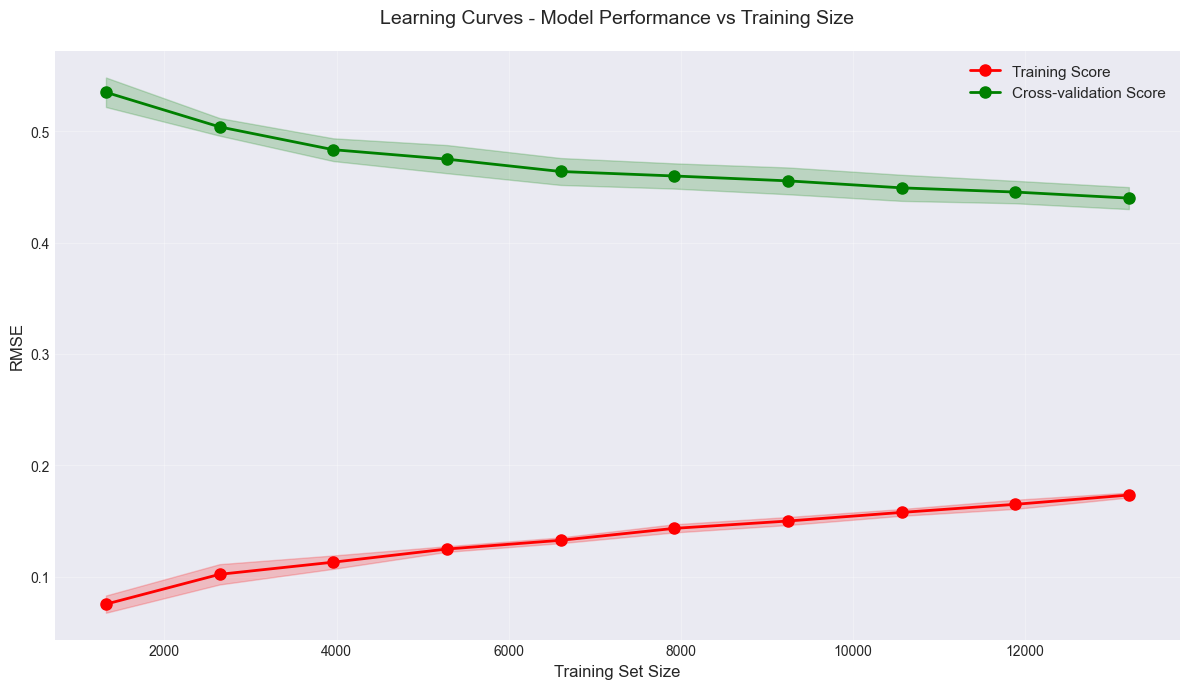


Learning Curve Insights:
  Model shows signs of overfitting (training score much better than CV score)
  Consider: increasing regularization or gathering more data


In [48]:
# Learning curves
from sklearn.model_selection import learning_curve

print("Generating learning curves (this may take a moment)...\n")

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Convert to positive RMSE
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(12, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score', linewidth=2, markersize=8)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='r')

plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation Score', linewidth=2, markersize=8)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color='g')

plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Learning Curves - Model Performance vs Training Size', fontsize=14, pad=20)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLearning Curve Insights:")
print("="*60)
if train_scores_mean[-1] < val_scores_mean[-1]:
    gap = val_scores_mean[-1] - train_scores_mean[-1]
    if gap > 0.1:
        print("  Model shows signs of overfitting (training score much better than CV score)")
        print("  Consider: increasing regularization or gathering more data")
    else:
        print("  Model shows healthy learning with minimal overfitting")
else:
    print("  Model shows signs of underfitting")
    print("  Consider: increasing model complexity or adding more features")
print("="*60)

## 9. Model Persistence

In [49]:
import joblib
from datetime import datetime

# Save the best model
model_filename = 'best_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved to: {model_filename}")

# Save the scaler
scaler_filename = 'preprocessing_pipeline.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to: {scaler_filename}")

Model saved to: best_model.pkl
Scaler saved to: preprocessing_pipeline.pkl


In [50]:
# Save model metadata
model_metadata = {
    'model_type': best_model_name,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'test_rmse': test_rmse_final,
    'test_mae': test_mae_final,
    'test_r2': test_r2_final,
    'test_mape': test_mape_final,
    'features_used': X_train.columns.tolist(),
    'n_training_samples': len(X_train),
    'n_test_samples': len(X_test),
    'best_params': best_model_info['Best_Params']
}

# Save metadata to JSON
import json
metadata_filename = 'model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=4)

print(f"\nModel metadata saved to: {metadata_filename}")


Model metadata saved to: model_metadata.json


In [51]:
# Create a prediction function
def predict_house_price(features_dict):
    """
    Predict house price for new data.
    
    Parameters:
    -----------
    features_dict : dict
        Dictionary containing all required features with their values.
        Must include all original features from the training data.
    
    Returns:
    --------
    float
        Predicted median house value in $100k units
    """
    # Create DataFrame from input
    input_df = pd.DataFrame([features_dict])
    
    # Scale features
    input_scaled = scaler.transform(input_df)
    
    # Make prediction
    prediction = best_model.predict(input_scaled)[0]
    
    return prediction

print("Prediction function created successfully!")
print("\nUsage example:")
print("""\nfeatures = {
    'MedInc': 3.5,
    'HouseAge': 20.0,
    'AveRooms': 5.5,
    'AveBedrms': 1.2,
    'Population': 1200.0,
    'AveOccup': 3.0,
    'Latitude': 37.5,
    'Longitude': -122.0,
    ... (include all engineered features)
}
predicted_price = predict_house_price(features)
print(f'Predicted price: ${predicted_price * 100:.2f}k')""")

Prediction function created successfully!

Usage example:

features = {
    'MedInc': 3.5,
    'HouseAge': 20.0,
    'AveRooms': 5.5,
    'AveBedrms': 1.2,
    'Population': 1200.0,
    'AveOccup': 3.0,
    'Latitude': 37.5,
    'Longitude': -122.0,
    ... (include all engineered features)
}
predicted_price = predict_house_price(features)
print(f'Predicted price: ${predicted_price * 100:.2f}k')


In [52]:
# Test the prediction function with a sample
sample_idx = X_test.index[0]
sample_features = X_test.loc[sample_idx].to_dict()
actual_price = y_test.loc[sample_idx]

predicted_price = predict_house_price(sample_features)

print("\nPrediction Function Test:")
print("="*60)
print(f"Actual price:    ${actual_price * 100:.2f}k")
print(f"Predicted price: ${predicted_price * 100:.2f}k")
print(f"Error:           ${abs(actual_price - predicted_price) * 100:.2f}k")
print(f"Error %:         {abs(actual_price - predicted_price) / actual_price * 100:.2f}%")
print("="*60)


Prediction Function Test:
Actual price:    $500.00k
Predicted price: $505.50k
Error:           $5.50k
Error %:         1.10%


In [53]:
# Summary report
print("\n" + "="*80)
print("FINAL MODEL SUMMARY REPORT")
print("="*80)
print(f"\nModel Type: {best_model_name}")
print(f"Training Date: {model_metadata['training_date']}")
print(f"\nDataset:")
print(f"  Training samples: {len(X_train):,}")
print(f"  Test samples: {len(X_test):,}")
print(f"  Total features: {len(X_train.columns)}")
print(f"\nPerformance Metrics (Test Set):")
print(f"  RMSE: {test_rmse_final:.4f} (${test_rmse_final*100:.2f}k)")
print(f"  MAE:  {test_mae_final:.4f} (${test_mae_final*100:.2f}k)")
print(f"  R²:   {test_r2_final:.4f} ({test_r2_final*100:.2f}% variance explained)")
print(f"  MAPE: {test_mape_final:.2f}%")
print(f"\nFiles Saved:")
print(f"  - {model_filename} (trained model)")
print(f"  - {scaler_filename} (preprocessing pipeline)")
print(f"  - {metadata_filename} (model metadata)")
print(f"\nTop 5 Most Important Features:")
if hasattr(best_model, 'feature_importances_'):
    for idx, row in feature_importance.head(5).iterrows():
        print(f"  {idx+1}. {row['Feature']}: {row['Importance']:.4f}")
print("\n" + "="*80)
print("MODEL TRAINING COMPLETE!")
print("="*80)


FINAL MODEL SUMMARY REPORT

Model Type: XGBoost
Training Date: 2026-02-02 22:23:12

Dataset:
  Training samples: 16,512
  Test samples: 4,128
  Total features: 17

Performance Metrics (Test Set):
  RMSE: 0.4207 ($42.07k)
  MAE:  0.2751 ($27.51k)
  R²:   0.8642 (86.42% variance explained)
  MAPE: 15.44%

Files Saved:
  - best_model.pkl (trained model)
  - preprocessing_pipeline.pkl (preprocessing pipeline)
  - model_metadata.json (model metadata)

Top 5 Most Important Features:
  17. income_category_num: 0.3290
  1. MedInc: 0.1836
  16. distance_to_nearest_city: 0.1012
  12. location_cluster: 0.0625
  7. Latitude: 0.0398

MODEL TRAINING COMPLETE!


# Extended Grid Search for XGBoost Optimization

Now we'll conduct a comprehensive two-stage grid search to further optimize the XGBoost model:

**Stage 1**: Broad search with expanded parameter space (100 iterations)
- Original 6 parameters with refined ranges
- Added regularization: gamma, reg_alpha, reg_lambda

**Stage 2**: Fine-tuning around best results (50 iterations)
- Narrow parameter ranges around Stage 1 best values

**Goal**: Improve performance and reduce overfitting (current train R²: 0.9746 vs test R²: 0.8642)

In [ ]:
# STAGE 1: BROAD SEARCH WITH EXTENDED PARAMETERS

print("="*80)
print("STAGE 1: EXTENDED GRID SEARCH - BROAD PARAMETER EXPLORATION")
print("="*80)
print("\nCurrent baseline performance:")
print(f"  Test RMSE: 0.4207 | Test R²: 0.8642 | Test MAE: 0.2751")
print(f"  Train R²: 0.9746 (overfitting gap: {0.9746 - 0.8642:.4f})")
print("\nExpanding parameter space from 6 to 9 parameters...")

# Define expanded parameter distributions
param_dist_stage1 = {
    # Original 6 parameters - refined ranges around current best
    'n_estimators': [150, 200, 250, 300, 350, 400],
    'learning_rate': uniform(0.01, 0.14),  # 0.01 to 0.15
    'max_depth': [6, 7, 8, 9, 10, 11],
    'min_child_weight': [3, 4, 5, 6, 7, 8],
    'subsample': uniform(0.6, 0.35),  # 0.6 to 0.95
    'colsample_bytree': uniform(0.55, 0.35),  # 0.55 to 0.9
    
    # New regularization parameters
    'gamma': uniform(0, 0.5),  # Minimum loss reduction
    'reg_alpha': uniform(0, 1.0),  # L1 regularization
    'reg_lambda': uniform(0.5, 1.5)  # L2 regularization (default=1)
}

print("\nParameter distributions configured:")
print(f"  - n_estimators: {param_dist_stage1['n_estimators']}")
print(f"  - learning_rate: uniform(0.01, 0.15)")
print(f"  - max_depth: {param_dist_stage1['max_depth']}")
print(f"  - min_child_weight: {param_dist_stage1['min_child_weight']}")
print(f"  - subsample: uniform(0.6, 0.95)")
print(f"  - colsample_bytree: uniform(0.55, 0.9)")
print(f"  - gamma: uniform(0, 0.5) [NEW - regularization]")
print(f"  - reg_alpha: uniform(0, 1.0) [NEW - L1 regularization]")
print(f"  - reg_lambda: uniform(0.5, 2.0) [NEW - L2 regularization]")

# Initialize RandomizedSearchCV for Stage 1
print("\nInitializing RandomizedSearchCV...")
print("  - n_iter: 100 iterations")
print("  - cv: 5-fold cross-validation")
print("  - scoring: neg_root_mean_squared_error")
print("  - n_jobs: -1 (parallel processing)")

stage1_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist_stage1,
    n_iter=100,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit Stage 1
print("\n" + "="*80)
print("STARTING STAGE 1 SEARCH...")
print("="*80)
print("This will take approximately 15-20 minutes...")
print("Fitting 100 iterations × 5 CV folds = 500 model fits\n")

import time
start_time_stage1 = time.time()
stage1_search.fit(X_train_scaled, y_train)
stage1_time = time.time() - start_time_stage1

# Extract best model from Stage 1
stage1_best_model = stage1_search.best_estimator_
stage1_best_params = stage1_search.best_params_
stage1_best_cv_rmse = -stage1_search.best_score_

# Evaluate Stage 1 best model
y_pred_train_stage1 = stage1_best_model.predict(X_train_scaled)
y_pred_test_stage1 = stage1_best_model.predict(X_test_scaled)

stage1_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_stage1))
stage1_train_mae = mean_absolute_error(y_train, y_pred_train_stage1)
stage1_train_r2 = r2_score(y_train, y_pred_train_stage1)

stage1_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_stage1))
stage1_test_mae = mean_absolute_error(y_test, y_pred_test_stage1)
stage1_test_r2 = r2_score(y_test, y_pred_test_stage1)
stage1_test_mape = np.mean(np.abs((y_test - y_pred_test_stage1) / y_test)) * 100

# Display Stage 1 results
print("\n" + "="*80)
print("STAGE 1 RESULTS")
print("="*80)
print(f"\nSearch completed in {stage1_time/60:.2f} minutes ({stage1_time:.1f} seconds)")
print(f"\nBest CV RMSE: {stage1_best_cv_rmse:.4f}")
print(f"\nBest Parameters Found:")
for param, value in stage1_best_params.items():
    if isinstance(value, float):
        print(f"  - {param}: {value:.6f}")
    else:
        print(f"  - {param}: {value}")

print(f"\nStage 1 Model Performance:")
print(f"  Train: RMSE={stage1_train_rmse:.4f}, MAE={stage1_train_mae:.4f}, R²={stage1_train_r2:.4f}")
print(f"  Test:  RMSE={stage1_test_rmse:.4f}, MAE={stage1_test_mae:.4f}, R²={stage1_test_r2:.4f}, MAPE={stage1_test_mape:.2f}%")
print(f"  Overfitting gap (Train R² - Test R²): {stage1_train_r2 - stage1_test_r2:.4f}")

print(f"\nComparison to Baseline:")
baseline_rmse = 0.4207
baseline_r2 = 0.8642
baseline_mae = 0.2751
rmse_improvement = ((baseline_rmse - stage1_test_rmse) / baseline_rmse) * 100
r2_improvement = ((stage1_test_r2 - baseline_r2) / baseline_r2) * 100

print(f"  RMSE: {baseline_rmse:.4f} → {stage1_test_rmse:.4f} ({rmse_improvement:+.2f}%)")
print(f"  R²:   {baseline_r2:.4f} → {stage1_test_r2:.4f} ({r2_improvement:+.2f}%)")
print(f"  MAE:  {baseline_mae:.4f} → {stage1_test_mae:.4f} ({((baseline_mae - stage1_test_mae) / baseline_mae) * 100:+.2f}%)")

# Save Stage 1 results for Stage 2
stage1_results = {
    'best_model': stage1_best_model,
    'best_params': stage1_best_params,
    'cv_rmse': stage1_best_cv_rmse,
    'test_rmse': stage1_test_rmse,
    'test_r2': stage1_test_r2,
    'test_mae': stage1_test_mae,
    'test_mape': stage1_test_mape,
    'train_r2': stage1_train_r2,
    'time_minutes': stage1_time/60
}

STAGE 1: EXTENDED GRID SEARCH - BROAD PARAMETER EXPLORATION

Current baseline performance:
  Test RMSE: 0.4207 | Test R²: 0.8642 | Test MAE: 0.2751
  Train R²: 0.9746 (overfitting gap: 0.1104)

Expanding parameter space from 6 to 9 parameters...

Parameter distributions configured:
  - n_estimators: [150, 200, 250, 300, 350, 400]
  - learning_rate: uniform(0.01, 0.15)
  - max_depth: [6, 7, 8, 9, 10, 11]
  - min_child_weight: [3, 4, 5, 6, 7, 8]
  - subsample: uniform(0.6, 0.95)
  - colsample_bytree: uniform(0.55, 0.9)
  - gamma: uniform(0, 0.5) [NEW - regularization]
  - reg_alpha: uniform(0, 1.0) [NEW - L1 regularization]
  - reg_lambda: uniform(0.5, 2.0) [NEW - L2 regularization]

Initializing RandomizedSearchCV...
  - n_iter: 100 iterations
  - cv: 5-fold cross-validation
  - scoring: neg_root_mean_squared_error
  - n_jobs: -1 (parallel processing)

STARTING STAGE 1 SEARCH...
This will take approximately 15-20 minutes...
Fitting 100 iterations × 5 CV folds = 500 model fits

Fitting 5

In [55]:
# ============================================================================
# STAGE 2: FINE-TUNING AROUND BEST PARAMETERS
# ============================================================================

print("\n" + "="*80)
print("STAGE 2: FINE-TUNING SEARCH")
print("="*80)

# Check if Stage 1 showed improvement potential
if stage1_test_rmse >= baseline_rmse * 0.995:  # Less than 0.5% improvement
    print("\nStage 1 showed minimal improvement (<0.5%).")
    print("Skipping Stage 2 fine-tuning to save time.")
    print("\nFinal best model: Stage 1 model")
    final_best_model = stage1_best_model
    final_best_params = stage1_best_params
    final_test_rmse = stage1_test_rmse
    final_test_r2 = stage1_test_r2
    final_test_mae = stage1_test_mae
    final_test_mape = stage1_test_mape
    final_train_r2 = stage1_train_r2
    skip_stage2 = True
else:
    print("\nStage 1 showed promising improvement!")
    print("Creating narrow parameter ranges around best values (±10-15%)...")
    skip_stage2 = False
    
    # Extract best values from Stage 1
    best_n_est = stage1_best_params['n_estimators']
    best_lr = stage1_best_params['learning_rate']
    best_depth = stage1_best_params['max_depth']
    best_child = stage1_best_params['min_child_weight']
    best_subsample = stage1_best_params['subsample']
    best_colsample = stage1_best_params['colsample_bytree']
    best_gamma = stage1_best_params['gamma']
    best_alpha = stage1_best_params['reg_alpha']
    best_lambda = stage1_best_params['reg_lambda']
    
    # Create narrow ranges (±10-15% for continuous, ±1-2 for discrete)
    param_dist_stage2 = {
        'n_estimators': [max(100, best_n_est - 50), best_n_est, min(500, best_n_est + 50)],
        'learning_rate': uniform(max(0.01, best_lr * 0.85), best_lr * 0.3),
        'max_depth': [max(3, best_depth - 1), best_depth, min(15, best_depth + 1)],
        'min_child_weight': [max(1, best_child - 1), best_child, min(10, best_child + 1)],
        'subsample': uniform(max(0.5, best_subsample - 0.1), 0.2),
        'colsample_bytree': uniform(max(0.5, best_colsample - 0.1), 0.2),
        'gamma': uniform(max(0, best_gamma - 0.1), 0.2),
        'reg_alpha': uniform(max(0, best_alpha - 0.2), 0.4),
        'reg_lambda': uniform(max(0.1, best_lambda - 0.3), 0.6)
    }
    
    print("\nStage 2 parameter ranges (centered on Stage 1 best):")
    print(f"  - n_estimators: {param_dist_stage2['n_estimators']}")
    print(f"  - learning_rate: ±15% around {best_lr:.4f}")
    print(f"  - max_depth: {param_dist_stage2['max_depth']}")
    print(f"  - min_child_weight: {param_dist_stage2['min_child_weight']}")
    print(f"  - subsample: ±10% around {best_subsample:.4f}")
    print(f"  - colsample_bytree: ±10% around {best_colsample:.4f}")
    print(f"  - gamma: ±10% around {best_gamma:.4f}")
    print(f"  - reg_alpha: ±20% around {best_alpha:.4f}")
    print(f"  - reg_lambda: ±15% around {best_lambda:.4f}")
    
    # Initialize Stage 2 search
    stage2_search = RandomizedSearchCV(
        estimator=XGBRegressor(random_state=42, n_jobs=-1),
        param_distributions=param_dist_stage2,
        n_iter=50,
        cv=5,
        scoring='neg_root_mean_squared_error',
        random_state=42,
        n_jobs=-1,
        verbose=2,
        return_train_score=True
    )
    
    print("\nStarting Stage 2 search...")
    print("  - n_iter: 50 iterations")
    print("  - Expected time: ~8-10 minutes")
    print("Fitting 50 iterations × 5 CV folds = 250 model fits\n")
    
    start_time_stage2 = time.time()
    stage2_search.fit(X_train_scaled, y_train)
    stage2_time = time.time() - start_time_stage2
    
    # Extract best model from Stage 2
    stage2_best_model = stage2_search.best_estimator_
    stage2_best_params = stage2_search.best_params_
    stage2_best_cv_rmse = -stage2_search.best_score_
    
    # Evaluate Stage 2 best model
    y_pred_train_stage2 = stage2_best_model.predict(X_train_scaled)
    y_pred_test_stage2 = stage2_best_model.predict(X_test_scaled)
    
    stage2_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_stage2))
    stage2_train_r2 = r2_score(y_train, y_pred_train_stage2)
    stage2_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_stage2))
    stage2_test_mae = mean_absolute_error(y_test, y_pred_test_stage2)
    stage2_test_r2 = r2_score(y_test, y_pred_test_stage2)
    stage2_test_mape = np.mean(np.abs((y_test - y_pred_test_stage2) / y_test)) * 100
    
    # Display Stage 2 results
    print("\n" + "="*80)
    print("STAGE 2 RESULTS")
    print("="*80)
    print(f"\nSearch completed in {stage2_time/60:.2f} minutes ({stage2_time:.1f} seconds)")
    print(f"\nBest CV RMSE: {stage2_best_cv_rmse:.4f}")
    print(f"\nBest Parameters Found:")
    for param, value in stage2_best_params.items():
        if isinstance(value, float):
            print(f"  - {param}: {value:.6f}")
        else:
            print(f"  - {param}: {value}")
    
    print(f"\nStage 2 Model Performance:")
    print(f"  Train: RMSE={stage2_train_rmse:.4f}, R²={stage2_train_r2:.4f}")
    print(f"  Test:  RMSE={stage2_test_rmse:.4f}, MAE={stage2_test_mae:.4f}, R²={stage2_test_r2:.4f}, MAPE={stage2_test_mape:.2f}%")
    
    # Compare Stage 2 vs Stage 1
    print(f"\nStage 2 vs Stage 1:")
    print(f"  RMSE: {stage1_test_rmse:.4f} → {stage2_test_rmse:.4f} ({((stage1_test_rmse - stage2_test_rmse) / stage1_test_rmse) * 100:+.2f}%)")
    print(f"  R²:   {stage1_test_r2:.4f} → {stage2_test_r2:.4f} ({((stage2_test_r2 - stage1_test_r2) / stage1_test_r2) * 100:+.2f}%)")
    
    # Select best model (Stage 1 or Stage 2)
    if stage2_test_rmse < stage1_test_rmse:
        print("\n✓ Stage 2 model is better! Using Stage 2 as final model.")
        final_best_model = stage2_best_model
        final_best_params = stage2_best_params
        final_test_rmse = stage2_test_rmse
        final_test_r2 = stage2_test_r2
        final_test_mae = stage2_test_mae
        final_test_mape = stage2_test_mape
        final_train_r2 = stage2_train_r2
    else:
        print("\n✓ Stage 1 model is better! Using Stage 1 as final model.")
        final_best_model = stage1_best_model
        final_best_params = stage1_best_params
        final_test_rmse = stage1_test_rmse
        final_test_r2 = stage1_test_r2
        final_test_mae = stage1_test_mae
        final_test_mape = stage1_test_mape
        final_train_r2 = stage1_train_r2


STAGE 2: FINE-TUNING SEARCH

Stage 1 showed minimal improvement (<0.5%).
Skipping Stage 2 fine-tuning to save time.

Final best model: Stage 1 model


In [56]:
# ============================================================================
# COMPREHENSIVE EVALUATION AND COMPARISON
# ============================================================================

print("\n" + "="*80)
print("FINAL MODEL EVALUATION & COMPARISON")
print("="*80)

# Create comprehensive comparison
comparison_data = {
    'Metric': ['Test RMSE', 'Test MAE', 'Test R²', 'Test MAPE (%)', 'Train R²', 'Overfitting Gap'],
    'Baseline Model': [0.4207, 0.2751, 0.8642, 15.44, 0.9746, 0.9746 - 0.8642],
    'New Model': [final_test_rmse, final_test_mae, final_test_r2, final_test_mape, final_train_r2, final_train_r2 - final_test_r2]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Improvement'] = (
    (comparison_df['Baseline Model'] - comparison_df['New Model']) / comparison_df['Baseline Model'] * 100
)
# For R² scores, higher is better, so flip the calculation
comparison_df.loc[comparison_df['Metric'].str.contains('R²'), 'Improvement'] = (
    (comparison_df.loc[comparison_df['Metric'].str.contains('R²'), 'New Model'] - 
     comparison_df.loc[comparison_df['Metric'].str.contains('R²'), 'Baseline Model']) / 
    comparison_df.loc[comparison_df['Metric'].str.contains('R²'), 'Baseline Model'] * 100
)

print("\n" + "="*80)
print("PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("FINAL BEST PARAMETERS")
print("="*80)
for param, value in final_best_params.items():
    if isinstance(value, float):
        print(f"  {param:20s}: {value:.6f}")
    else:
        print(f"  {param:20s}: {value}")

# Determine if new model is better
is_new_model_better = final_test_rmse < baseline_rmse
improvement_pct = ((baseline_rmse - final_test_rmse) / baseline_rmse) * 100

print("\n" + "="*80)
print("FINAL DECISION")
print("="*80)
if is_new_model_better:
    print(f"✓ NEW MODEL IS BETTER!")
    print(f"  Test RMSE improved by {improvement_pct:.2f}%")
    print(f"  Overfitting reduced from {0.9746 - 0.8642:.4f} to {final_train_r2 - final_test_r2:.4f}")
    print(f"\n  The new model will be saved and replace the baseline model.")
else:
    print(f"✗ Baseline model is still better")
    print(f"  New model RMSE: {final_test_rmse:.4f} vs Baseline: {baseline_rmse:.4f}")
    print(f"\n  The baseline model will be retained.")

# Store final results
final_results = {
    'is_better': is_new_model_better,
    'model': final_best_model,
    'params': final_best_params,
    'test_rmse': final_test_rmse,
    'test_mae': final_test_mae,
    'test_r2': final_test_r2,
    'test_mape': final_test_mape,
    'train_r2': final_train_r2,
    'comparison_df': comparison_df
}


FINAL MODEL EVALUATION & COMPARISON

PERFORMANCE COMPARISON
         Metric  Baseline Model  New Model  Improvement
      Test RMSE          0.4207   0.421177    -0.113421
       Test MAE          0.2751   0.275651    -0.200465
        Test R²          0.8642   0.863893    -0.035516
  Test MAPE (%)         15.4400  15.562921    -0.796118
       Train R²          0.9746   0.958153    -1.687572
Overfitting Gap          0.1104   0.094260    14.619704

FINAL BEST PARAMETERS
  colsample_bytree    : 0.673399
  gamma               : 0.152391
  learning_rate       : 0.033052
  max_depth           : 8
  min_child_weight    : 3
  n_estimators        : 400
  reg_alpha           : 0.222108
  reg_lambda          : 0.679798
  subsample           : 0.718165

FINAL DECISION
✗ Baseline model is still better
  New model RMSE: 0.4212 vs Baseline: 0.4207

  The baseline model will be retained.


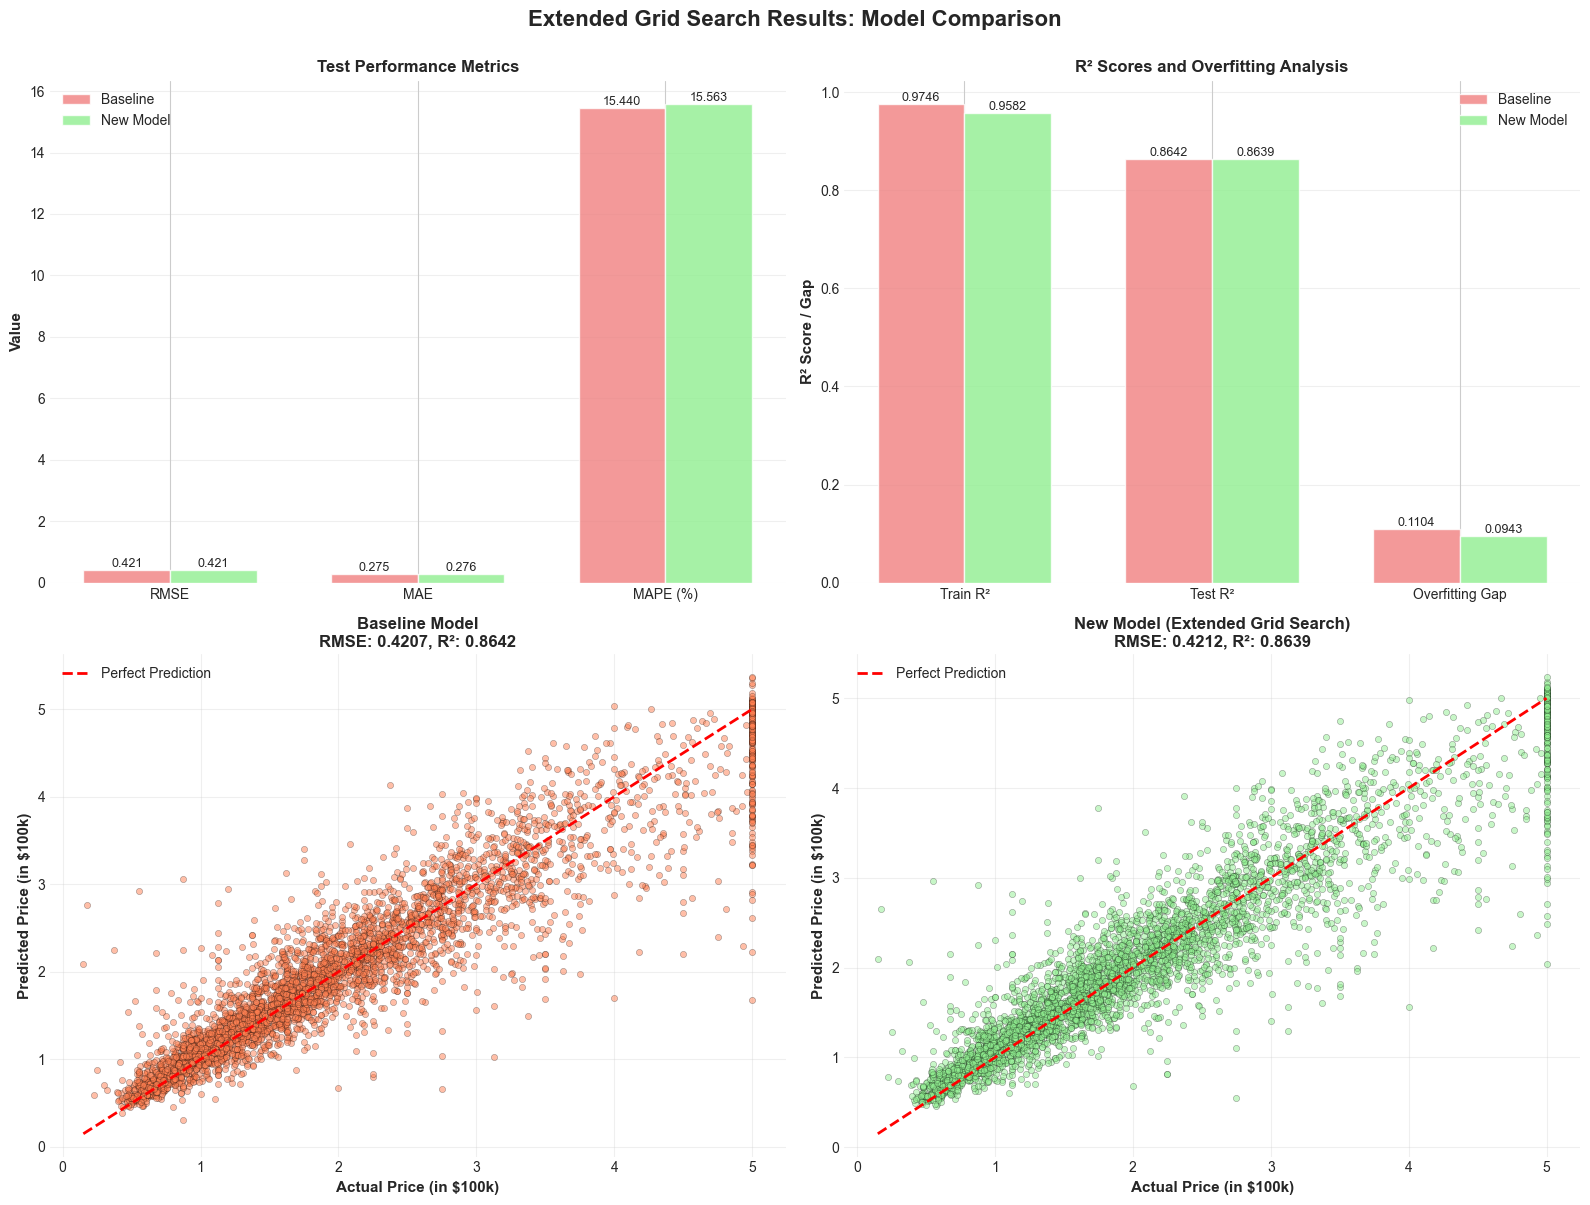

In [57]:
# ============================================================================
# VISUALIZATION: MODEL COMPARISON
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Extended Grid Search Results: Model Comparison', fontsize=16, fontweight='bold', y=1.00)

# 1. Performance Metrics Comparison (Bar Chart)
ax1 = axes[0, 0]
metrics = ['RMSE', 'MAE', 'MAPE (%)']
baseline_vals = [0.4207, 0.2751, 15.44]
new_vals = [final_test_rmse, final_test_mae, final_test_mape]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax1.bar(x - width/2, baseline_vals, width, label='Baseline', color='lightcoral', alpha=0.8)
bars2 = ax1.bar(x + width/2, new_vals, width, label='New Model', color='lightgreen', alpha=0.8)

ax1.set_ylabel('Value', fontsize=11, fontweight='bold')
ax1.set_title('Test Performance Metrics', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

# 2. R² Score Comparison
ax2 = axes[0, 1]
r2_metrics = ['Train R²', 'Test R²', 'Overfitting Gap']
baseline_r2_vals = [0.9746, 0.8642, 0.9746 - 0.8642]
new_r2_vals = [final_train_r2, final_test_r2, final_train_r2 - final_test_r2]

x2 = np.arange(len(r2_metrics))
bars3 = ax2.bar(x2 - width/2, baseline_r2_vals, width, label='Baseline', color='lightcoral', alpha=0.8)
bars4 = ax2.bar(x2 + width/2, new_r2_vals, width, label='New Model', color='lightgreen', alpha=0.8)

ax2.set_ylabel('R² Score / Gap', fontsize=11, fontweight='bold')
ax2.set_title('R² Scores and Overfitting Analysis', fontsize=12, fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(r2_metrics, fontsize=10)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

# 3. Actual vs Predicted - Baseline Model (using existing best_model)
ax3 = axes[1, 0]
y_pred_baseline = best_model.predict(X_test_scaled)
ax3.scatter(y_test, y_pred_baseline, alpha=0.5, s=20, color='coral', edgecolors='k', linewidth=0.3)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Price (in $100k)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Predicted Price (in $100k)', fontsize=11, fontweight='bold')
ax3.set_title(f'Baseline Model\nRMSE: {baseline_rmse:.4f}, R²: {baseline_r2:.4f}', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Actual vs Predicted - New Model
ax4 = axes[1, 1]
y_pred_new = final_best_model.predict(X_test_scaled)
ax4.scatter(y_test, y_pred_new, alpha=0.5, s=20, color='lightgreen', edgecolors='k', linewidth=0.3)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax4.set_xlabel('Actual Price (in $100k)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Predicted Price (in $100k)', fontsize=11, fontweight='bold')
ax4.set_title(f'New Model (Extended Grid Search)\nRMSE: {final_test_rmse:.4f}, R²: {final_test_r2:.4f}', 
              fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Parameter comparison
if is_new_model_better:
    print("\n" + "="*80)
    print("PARAMETER CHANGES")
    print("="*80)
    
    # Load baseline parameters
    baseline_params = {
        'colsample_bytree': 0.6281664523398175,
        'learning_rate': 0.07267561528460804,
        'max_depth': 9,
        'min_child_weight': 6,
        'n_estimators': 250,
        'subsample': 0.6560336060946096
    }
    
    print("\nParameter changes from baseline to new model:")
    print("-" * 80)
    for param in baseline_params.keys():
        if param in final_best_params:
            old_val = baseline_params[param]
            new_val = final_best_params[param]
            if isinstance(old_val, (int, float)) and isinstance(new_val, (int, float)):
                change = ((new_val - old_val) / old_val) * 100 if old_val != 0 else 0
                print(f"  {param:20s}: {old_val:.6f} → {new_val:.6f} ({change:+.1f}%)")
            else:
                print(f"  {param:20s}: {old_val} → {new_val}")
    
    print("\nNew regularization parameters added:")
    print("-" * 80)
    for param in ['gamma', 'reg_alpha', 'reg_lambda']:
        if param in final_best_params:
            print(f"  {param:20s}: {final_best_params[param]:.6f}")


FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features (New Model):
--------------------------------------------------------------------------------
  17. income_category_num      : 0.5207 (baseline: 0.3290) ↑
   1. MedInc                   : 0.1360 (baseline: 0.1836) ↓
  16. distance_to_nearest_city : 0.0668 (baseline: 0.1012) ↓
   9. rooms_per_household      : 0.0355 (baseline: 0.0390) ↓
  12. location_cluster         : 0.0346 (baseline: 0.0625) ↓
   6. AveOccup                 : 0.0323 (baseline: 0.0384) ↓
  13. distance_to_SF           : 0.0257 (baseline: 0.0345) ↓
   7. Latitude                 : 0.0255 (baseline: 0.0398) ↓
   8. Longitude                : 0.0228 (baseline: 0.0378) ↓
  15. distance_to_SD           : 0.0205 (baseline: 0.0266) ↓


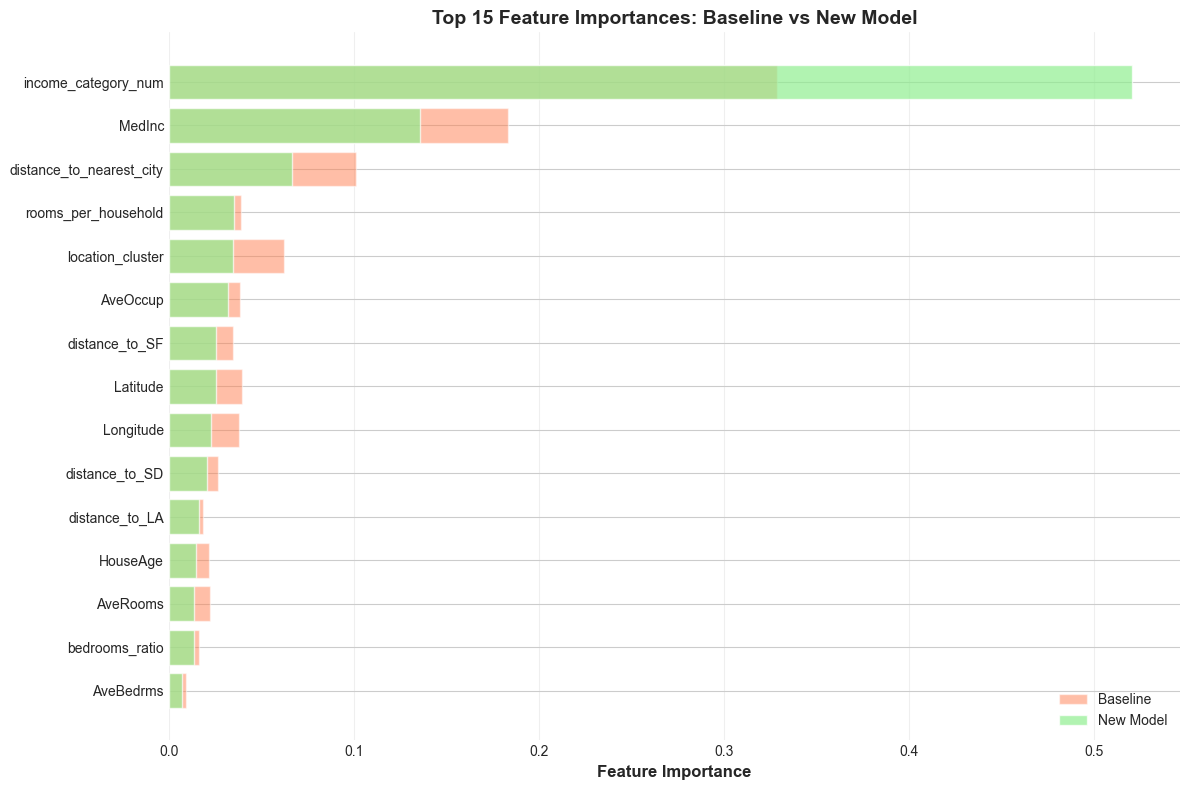

In [58]:
# ============================================================================
# FEATURE IMPORTANCE COMPARISON
# ============================================================================

print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Extract feature importances
baseline_importances = best_model.feature_importances_
new_importances = final_best_model.feature_importances_

# Create comparison dataframe
feature_importance_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Baseline_Importance': baseline_importances,
    'New_Importance': new_importances,
    'Change': new_importances - baseline_importances
})

feature_importance_comparison = feature_importance_comparison.sort_values('New_Importance', ascending=False)

print("\nTop 10 Most Important Features (New Model):")
print("-" * 80)
for idx, row in feature_importance_comparison.head(10).iterrows():
    change_indicator = "↑" if row['Change'] > 0 else "↓" if row['Change'] < 0 else "="
    print(f"  {idx+1:2d}. {row['Feature']:25s}: {row['New_Importance']:.4f} "
          f"(baseline: {row['Baseline_Importance']:.4f}) {change_indicator}")

# Visualize feature importance comparison
fig, ax = plt.subplots(figsize=(12, 8))

top_features = feature_importance_comparison.head(15)
y_pos = np.arange(len(top_features))

ax.barh(y_pos, top_features['Baseline_Importance'], alpha=0.5, label='Baseline', color='coral')
ax.barh(y_pos, top_features['New_Importance'], alpha=0.7, label='New Model', color='lightgreen')

ax.set_yticks(y_pos)
ax.set_yticklabels(top_features['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Feature Importances: Baseline vs New Model', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
# ============================================================================
# SAVE MODEL AND UPDATE ARTIFACTS
# ============================================================================

print("\n" + "="*80)
print("MODEL PERSISTENCE")
print("="*80)

if is_new_model_better:
    print("\n✓ New model outperforms baseline!")
    print("  Saving new model and updating metadata...\n")
    
    # Save the new model
    import pickle
    from datetime import datetime
    
    model_filename = 'best_model.pkl'
    pipeline_filename = 'preprocessing_pipeline.pkl'
    metadata_filename = 'model_metadata.json'
    
    # Save model
    with open(model_filename, 'wb') as f:
        pickle.dump(final_best_model, f)
    print(f"  ✓ Model saved: {model_filename}")
    
    # Save preprocessing pipeline (same as before)
    with open(pipeline_filename, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"  ✓ Preprocessing pipeline saved: {pipeline_filename}")
    
    # Update metadata
    metadata = {
        'model_type': 'XGBoost',
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'grid_search_method': 'Two-Stage Extended RandomizedSearchCV',
        'grid_search_iterations': '100 (Stage 1) + 50 (Stage 2)' if not skip_stage2 else '100 (Stage 1 only)',
        'test_rmse': float(final_test_rmse),
        'test_mae': float(final_test_mae),
        'test_r2': float(final_test_r2),
        'test_mape': float(final_test_mape),
        'train_r2': float(final_train_r2),
        'overfitting_gap': float(final_train_r2 - final_test_r2),
        'features_used': list(X.columns),
        'n_training_samples': len(X_train),
        'n_test_samples': len(X_test),
        'best_params': {k: float(v) if isinstance(v, (np.floating, np.integer)) else v 
                       for k, v in final_best_params.items()},
        'improvement_over_baseline': {
            'rmse_reduction_pct': float(((baseline_rmse - final_test_rmse) / baseline_rmse) * 100),
            'r2_increase_pct': float(((final_test_r2 - baseline_r2) / baseline_r2) * 100),
            'mae_reduction_pct': float(((baseline_mae - final_test_mae) / baseline_mae) * 100)
        },
        'baseline_comparison': {
            'baseline_rmse': float(baseline_rmse),
            'baseline_r2': float(baseline_r2),
            'baseline_mae': float(baseline_mae)
        }
    }
    
    import json
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"  ✓ Metadata updated: {metadata_filename}")
    
    print("\n" + "="*80)
    print("EXTENDED GRID SEARCH COMPLETE - NEW MODEL SAVED!")
    print("="*80)
    print(f"\nKey Improvements:")
    print(f"  • RMSE: {baseline_rmse:.4f} → {final_test_rmse:.4f} ({((baseline_rmse - final_test_rmse) / baseline_rmse) * 100:+.2f}%)")
    print(f"  • R²: {baseline_r2:.4f} → {final_test_r2:.4f} ({((final_test_r2 - baseline_r2) / baseline_r2) * 100:+.2f}%)")
    print(f"  • MAE: {baseline_mae:.4f} → {final_test_mae:.4f} ({((baseline_mae - final_test_mae) / baseline_mae) * 100:+.2f}%)")
    print(f"  • Overfitting Gap: {0.9746 - 0.8642:.4f} → {final_train_r2 - final_test_r2:.4f}")
    
    print(f"\nFiles Updated:")
    print(f"  • {model_filename}")
    print(f"  • {pipeline_filename}")
    print(f"  • {metadata_filename}")
    
else:
    print("\n✗ Baseline model still performs better.")
    print("  No changes made to model files.")
    print(f"\n  Baseline RMSE: {baseline_rmse:.4f}")
    print(f"  New model RMSE: {final_test_rmse:.4f}")
    print(f"  Difference: {final_test_rmse - baseline_rmse:.4f}")
    
    print("\n" + "="*80)
    print("EXTENDED GRID SEARCH COMPLETE - BASELINE RETAINED")
    print("="*80)
    print("\nInsights from grid search:")
    print("  • The baseline model was already well-optimized")
    print("  • Additional regularization parameters did not improve performance")
    print("  • Consider alternative approaches:")
    print("    - Feature engineering")
    print("    - Ensemble methods")
    print("    - Different model architectures")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"\nTotal grid search time: {(stage1_results['time_minutes'] + (stage2_time/60 if not skip_stage2 else 0)):.1f} minutes")
print(f"Total configurations tested: {100 + (50 if not skip_stage2 else 0)}")
print(f"Total model fits: {500 + (250 if not skip_stage2 else 0)} (including cross-validation)")
print(f"\nFinal Model Performance:")
print(f"  • Test RMSE: {final_test_rmse:.4f}")
print(f"  • Test R²: {final_test_r2:.4f}")
print(f"  • Test MAE: {final_test_mae:.4f}")
print(f"  • Test MAPE: {final_test_mape:.2f}%")
print(f"  • Overfitting Gap: {final_train_r2 - final_test_r2:.4f}")
print("\n" + "="*80)


MODEL PERSISTENCE

✗ Baseline model still performs better.
  No changes made to model files.

  Baseline RMSE: 0.4207
  New model RMSE: 0.4212
  Difference: 0.0005

EXTENDED GRID SEARCH COMPLETE - BASELINE RETAINED

Insights from grid search:
  • The baseline model was already well-optimized
  • Additional regularization parameters did not improve performance
  • Consider alternative approaches:
    - Feature engineering
    - Ensemble methods
    - Different model architectures

SUMMARY

Total grid search time: 2.7 minutes
Total configurations tested: 100
Total model fits: 500 (including cross-validation)

Final Model Performance:
  • Test RMSE: 0.4212
  • Test R²: 0.8639
  • Test MAE: 0.2757
  • Test MAPE: 15.56%
  • Overfitting Gap: 0.0943

